In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
%matplotlib inline

### Sample Check

In [4]:
dfx = pd.read_json("Datasets/news_events_2025_07_07.00093.jsonl", lines=True)
dfx.head(5)

,data,included
0,[{'id': '45bbf6ee-348a-4ea6-8f1d-e453c1ecfe96'...,[{'id': 'd7baf083-2f79-596e-af56-48de3b36fb49'...
1,[{'id': '468c45af-5a1b-45ab-916f-395d746450c4'...,[{'id': 'd7bb7658-108a-5a2d-b517-830e6c7d8398'...
2,[{'id': '46e14865-729c-457d-8d85-77e961e8c8d2'...,[{'id': 'd7b79f37-8db0-54b8-afd2-a3780a94663b'...
3,[{'id': '4769dc15-ee28-460b-b714-cb7a6d4cdcf1'...,[{'id': '1292de2e-8c2f-573f-a799-5c3f1105b1ef'...
4,[{'id': '47822434-0879-46ab-814c-20876e5eb3c2'...,[{'id': 'd7bb7658-108a-5a2d-b517-830e6c7d8398'...


In [ ]:
from pandas import json_normalize

# Flatten 'data' column
data_flatx = json_normalize(dfx['data'].explode())

print(data_flatx.head(5))

data_flatx.to_excel("sample_data.xlsx", index=False)

data_flatx.shape

                                     id        type  \
0  45bbf6ee-348a-4ea6-8f1d-e453c1ecfe96  news_event   
1  468c45af-5a1b-45ab-916f-395d746450c4  news_event   
2  46e14865-729c-457d-8d85-77e961e8c8d2  news_event   
3  4769dc15-ee28-460b-b714-cb7a6d4cdcf1  news_event   
4  47822434-0879-46ab-814c-20876e5eb3c2  news_event   

                                  attributes.summary attributes.category  \
0  Venchi US Inc. launches pistachio Easter egg a...            launches   
1    Cendyn Group acquired Letitrain on Aug 1st '19.            acquires   
2  Jonathan Armstrong at Cirdan Ltd recognized as...       recognized_as   
3  Siltbuster Limited partnered with Wessex Water...       partners_with   
4  Cendyn Group promoted Yakesh Arora to chief te...            promotes   

    attributes.found_at  attributes.confidence  \
0  2025-03-18T17:07:22Z                 0.7009   
1  2019-08-01T03:00:00Z                 0.5110   
2  2022-10-25T05:51:34Z                 0.8977   
3  2018-08-1

(25654, 41)

In [6]:
included_flatx = json_normalize(dfx['included'].explode())

print(included_flatx.head())

included_flatx.to_excel("sample_included.xlsx", index=False)

included_flatx.shape

                                     id          type attributes.domain  \
0  d7baf083-2f79-596e-af56-48de3b36fb49       company        venchi.com   
1  37b1af50-1b4a-42bf-83a0-aead6ec7612c  news_article               NaN   
2  d7bb7658-108a-5a2d-b517-830e6c7d8398       company        cendyn.com   
3  53d45fcf-6a50-54de-bc01-594423679bdf       company     letitrain.com   
4  e6a5f189-0585-4e32-aa8f-99d5bf1694f5  news_article               NaN   

  attributes.company_name attributes.ticker attributes.author  \
0          Venchi US Inc.              None               NaN   
1                     NaN               NaN              None   
2            Cendyn Group              None               NaN   
3               Letitrain              None               NaN   
4                     NaN               NaN              None   

                                     attributes.body  \
0                                                NaN   
1  Venchi launches pistachio Easter egg and an

(59695, 11)

Seems like there are a lot of duplicate records in 'sample_included'. Detecting the duplicates.

In [7]:
# Detectecting duplicates in sample included.

print("Actual Record size : ",included_flatx.shape)
print("Duplicated Record size : ",included_flatx[included_flatx.duplicated()].shape)

Actual Record size :  (59695, 11)
Duplicated Record size :  (26241, 11)


In [8]:
# Removing duplicates

included_flatx = included_flatx.drop_duplicates(keep='first')

print("Actual Record size : ",included_flatx.shape)
print("Duplicated Record size : ",included_flatx[included_flatx.duplicated()].shape)

Actual Record size :  (33454, 11)
Duplicated Record size :  (0, 11)


In [9]:
included_flatx.to_excel("sample_cleaned_included.xlsx",index=False)

Also the news articles are already present in the 'data_flatx'. Removing the columns contains news artile in 'included_flatx'.

In [10]:
included_flatx.columns

Index(['id', 'type', 'attributes.domain', 'attributes.company_name',
       'attributes.ticker', 'attributes.author', 'attributes.body',
       'attributes.image_url', 'attributes.url', 'attributes.published_at',
       'attributes.title'],
      dtype='object')

In [11]:
print("Actual Record size : ",included_flatx.shape)
included_flatx = included_flatx[included_flatx['type'] != "news_article"]
print("New Record size : ",included_flatx.shape)

Actual Record size :  (33454, 11)
New Record size :  (9273, 11)


In [12]:
included_flatx.to_excel("sample_cleaned_included.xlsx",index=False)

In [13]:
included_flatx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9273 entries, 0 to 59689
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       9273 non-null   object
 1   type                     9273 non-null   object
 2   attributes.domain        9273 non-null   object
 3   attributes.company_name  9262 non-null   object
 4   attributes.ticker        688 non-null    object
 5   attributes.author        0 non-null      object
 6   attributes.body          0 non-null      object
 7   attributes.image_url     0 non-null      object
 8   attributes.url           0 non-null      object
 9   attributes.published_at  0 non-null      object
 10  attributes.title         0 non-null      object
dtypes: object(11)
memory usage: 869.3+ KB


In [14]:
# Dropping columns with null values

for i in included_flatx.columns:
    if len(included_flatx[i].unique()) <= 1:
        included_flatx = included_flatx.drop(columns=i)

included_flatx.columns

Index(['id', 'attributes.domain', 'attributes.company_name',
       'attributes.ticker'],
      dtype='object')

Now we can merge a sample data and sample included to get company names.

In [15]:
data_flatx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25654 entries, 0 to 25653
Data columns (total 41 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25654 non-null  object 
 1   type                                          25654 non-null  object 
 2   attributes.summary                            25654 non-null  object 
 3   attributes.category                           25654 non-null  object 
 4   attributes.found_at                           25654 non-null  object 
 5   attributes.confidence                         25654 non-null  float64
 6   attributes.article_sentence                   25654 non-null  object 
 7   attributes.human_approved                     25654 non-null  bool   
 8   attributes.planning                           25654 non-null  bool   
 9   attributes.amount                             1581 non-null  

In [16]:
final_dfx = pd.merge(data_flatx,included_flatx,left_on='relationships.company1.data.id', right_on='id',how='left')
print("Sample Data Size : ",data_flatx.shape)
print("Sample Included Size : ",included_flatx.shape)
print("Merged Data Size : ", final_dfx.shape)
final_dfx.to_excel('sample_merged_df.xlsx',index=False)

Sample Data Size :  (25654, 41)
Sample Included Size :  (9273, 4)
Merged Data Size :  (25654, 45)


### Combining all Datasets

In [2]:
import pandas as pd
import glob
import os
from pandas import json_normalize

folder_path = "Datasets"

# Getting all JSONL files in the folder
all_files = glob.glob(os.path.join(folder_path, "*.jsonl"))

# Store flattened data from all files
all_data_flat = []
all_included_flat = []

for file in all_files:
    df = pd.read_json(file, lines=True)

    # Flatten - 'data'
    data_flat = json_normalize(df['data'].explode())
    all_data_flat.append(data_flat)

    # Flatten - 'included'
    included_flat = json_normalize(df['included'].explode())
    all_included_flat.append(included_flat)


# Combining all files into single DataFrames

all_data_df = pd.concat(all_data_flat, ignore_index=True)
print("Consolidated Flattened Data : ",all_data_df.shape)
all_data_df.to_excel("consolidated_flattened_data.xlsx", index=False)

all_included_df = pd.concat(all_included_flat, ignore_index=True)
print("Consolidated Flattened Included original : ",all_included_df.shape)

# Removing Duplicates and dropping 'news_article' from 'all_included_df'

all_included_df = all_included_df.drop_duplicates(keep='first')

all_included_df = all_included_df[all_included_df['type'] != 'news_article']

for i in all_included_df.columns:
    if len(all_included_df[i].unique()) <= 1:
        all_included_df = all_included_df.drop(columns=i)

print("Consolidated Flattened Included new : ",all_included_df.shape)

all_included_df.to_excel("consolidated_flattened_included.xlsx", index=False)

Consolidated Flattened Data :  (620785, 41)


ModuleNotFoundError: No module named 'openpyxl'

In [18]:
# Merging the data

merged_df = pd.merge(all_data_df, all_included_df, left_on='relationships.company1.data.id',right_on='id',how='left').drop(columns=['id_y'])
print("Merged Data : ", merged_df.shape)

merged_df.to_excel('merged_data.xlsx',index=False)

Merged Data :  (620785, 44)


In [19]:
merged_df_copy = merged_df.copy()
merged_df_copy.head(5)

,id_x,type,attributes.summary,attributes.category,attributes.found_at,attributes.confidence,attributes.article_sentence,attributes.human_approved,attributes.planning,attributes.amount,...,attributes.vulnerability,relationships.company1.data.id,relationships.company1.data.type,relationships.most_relevant_source.data.id,relationships.most_relevant_source.data.type,relationships.company2.data.id,relationships.company2.data.type,attributes.domain,attributes.company_name,attributes.ticker
0,0020f127-3470-4cce-8989-1c79f45da217,news_event,Unipart Manufacturing Group recognized as Tran...,recognized_as,2022-07-10T20:00:00Z,0.8759,In addition to being named the safest organisa...,False,False,None,...,None,000bd323-1bf8-5c7a-9941-e6c155c29d10,company,d172abc1-3755-4cef-946e-7de944806e7d,news_article,NaN,NaN,unipart.com,Unipart Manufacturing Group,None
1,009be1ff-6cfb-4e9f-a415-69baf71f47f3,news_event,OOS International received award two safety aw...,receives_award,2019-12-19T10:45:17Z,0.9497,Since then OOS International has been an activ...,False,False,None,...,None,000ff896-4292-5b15-9c81-8bf4d76c10d7,company,58c0d5fd-068d-4bab-8ac4-47e19bbdf091,news_article,NaN,NaN,oosinternational.com,OOS International,None
2,01444124-7375-4f03-8879-eb8200b31504,news_event,NWN Corporation received award Global Winner f...,receives_award,2022-07-12T20:00:00Z,0.6887,"As a result, with nearly 400 nominees from ove...",False,False,None,...,None,000d8a9c-882c-57f2-8b4c-2afc786d0fa1,company,ef330a38-8624-41c1-8b75-d1b96e7dbd45,news_article,NaN,NaN,nwncarousel.com,NWN Corporation,None
3,031a304c-29ca-415e-a815-e9c915896540,news_event,Grape Solutions Plc. is developing Mobiliti ap...,is_developing,2023-04-02T22:00:00Z,0.5987,MVM Mobiliti and Grape Solutions have been wor...,False,False,None,...,None,0008b75f-9d15-54ae-b70a-52301945e397,company,0525807d-6ff6-44a0-9c36-8be3afceba5b,news_article,NaN,NaN,grape.solutions,Grape Solutions Plc.,None
4,037783ca-f3f7-4782-8a81-df3cae1ac936,news_event,"NWN Corporation launched two new kits, At-Home...",launches,2022-04-13T01:02:36Z,0.7180,"NWN Carousel, the leading integrated cloud com...",False,False,None,...,None,000d8a9c-882c-57f2-8b4c-2afc786d0fa1,company,16061c55-111d-496a-9e3e-837dddc3454b,news_article,NaN,NaN,nwncarousel.com,NWN Corporation,None


In [20]:
#For Recovering initial state

merged_df = merged_df_copy.copy()

In [67]:
# backup code for larger datasets 

'''

folder_path = "Datasets"
all_files = glob.glob(os.path.join(folder_path, "*.jsonl"))

output_file = "all_flattened_data.csv"
first_write = True  # to write header only once

print(all_files)

i=1

for file in all_files:

    if i<=2:

        print(f"Processing: {file}")
        
        chunks = pd.read_json(file, lines=True, chunksize=50_000)
        
        for chunk in chunks:
            # Flatten 'data'
            data_flat = json_normalize(chunk['data'].explode())
            
            # Flatten 'included'
            included_flat = json_normalize(chunk['included'].explode())
            
            # Merge on ID columns
            merged_df = pd.merge(
                data_flat,
                included_flat,
                left_on="relationships.company1.data.id",
                right_on="id",
                how="inner"
            )
            
            # Write to CSV incrementally
            merged_df.to_csv(output_file, index=False, mode='a', header=first_write)
            first_write = False

        i+=1

    else:
        break



'''

'\n\nfolder_path = "Datasets"\nall_files = glob.glob(os.path.join(folder_path, "*.jsonl"))\n\noutput_file = "all_flattened_data.csv"\nfirst_write = True  # to write header only once\n\nprint(all_files)\n\ni=1\n\nfor file in all_files:\n\n    if i<=2:\n\n        print(f"Processing: {file}")\n        \n        chunks = pd.read_json(file, lines=True, chunksize=50_000)\n        \n        for chunk in chunks:\n            # Flatten \'data\'\n            data_flat = json_normalize(chunk[\'data\'].explode())\n            \n            # Flatten \'included\'\n            included_flat = json_normalize(chunk[\'included\'].explode())\n            \n            # Merge on ID columns\n            merged_df = pd.merge(\n                data_flat,\n                included_flat,\n                left_on="relationships.company1.data.id",\n                right_on="id",\n                how="inner"\n            )\n            \n            # Write to CSV incrementally\n            merged_df.to_csv(out

#### Analysis

In [21]:
merged_df.info()
merged_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620785 entries, 0 to 620784
Data columns (total 44 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id_x                                          620785 non-null  object 
 1   type                                          620785 non-null  object 
 2   attributes.summary                            620785 non-null  object 
 3   attributes.category                           620785 non-null  object 
 4   attributes.found_at                           620785 non-null  object 
 5   attributes.confidence                         620777 non-null  float64
 6   attributes.article_sentence                   620785 non-null  object 
 7   attributes.human_approved                     620785 non-null  bool   
 8   attributes.planning                           620785 non-null  bool   
 9   attributes.amount                             42

(620785, 44)

'attributes' is a common name in multiple columns. Removing it.

In [22]:
merged_df.columns = merged_df.columns.str.replace('attributes.',"",regex=False)
merged_df.columns

Index(['id_x', 'type', 'summary', 'category', 'found_at', 'confidence',
       'article_sentence', 'human_approved', 'planning', 'amount',
       'amount_normalized', 'assets', 'assets_tags', 'award', 'contact',
       'division', 'effective_date', 'event', 'financing_type',
       'financing_type_normalized', 'financing_type_tags', 'headcount',
       'job_title', 'job_title_tags', 'location', 'location_data', 'product',
       'product_data.full_text', 'product_data.name',
       'product_data.release_type', 'product_data.release_version',
       'product_data.fuzzy_match', 'product_tags', 'recognition',
       'vulnerability', 'relationships.company1.data.id',
       'relationships.company1.data.type',
       'relationships.most_relevant_source.data.id',
       'relationships.most_relevant_source.data.type',
       'relationships.company2.data.id', 'relationships.company2.data.type',
       'domain', 'company_name', 'ticker'],
      dtype='object')

In [23]:
# making a list of features which have missing values

features_missing_data = [features for features in merged_df.columns if merged_df[features].isnull().sum()>0]
print(" features_missing_data : ",len(features_missing_data))
features_missing_data

 features_missing_data :  29


['confidence',
 'amount',
 'amount_normalized',
 'assets',
 'award',
 'contact',
 'division',
 'effective_date',
 'event',
 'financing_type',
 'financing_type_normalized',
 'headcount',
 'job_title',
 'location',
 'product',
 'product_data.full_text',
 'product_data.name',
 'product_data.release_type',
 'product_data.release_version',
 'product_data.fuzzy_match',
 'recognition',
 'vulnerability',
 'relationships.company1.data.id',
 'relationships.company1.data.type',
 'relationships.company2.data.id',
 'relationships.company2.data.type',
 'domain',
 'company_name',
 'ticker']

In [24]:
# calculating the percentage of missing values in each features_missing_data

above_90_missing = []
below_5_missing = []

feature_mis = dict()

for feature in features_missing_data:
    print(feature.ljust(40),np.round((merged_df[feature].isnull().mean())*100,4), '% missing values')

    feature_mis[feature] = np.round((merged_df[feature].isnull().mean())*100,4)

    if np.round((merged_df[feature].isnull().mean())*100,4) > 90.0:
        above_90_missing.append(feature)

    if np.round((merged_df[feature].isnull().mean())*100,4) < 5.0:
        below_5_missing.append(feature)

print("Features missing more than 90 percent datapoints : ",above_90_missing)
print("Features missing less than 5 percent datapoints : ",below_5_missing)

# top 5 with highest missing values
print(feature_mis)

feature_mis = sorted(feature_mis.items(), key = lambda item : item[1], reverse = True)

abc = [f"{x[0]} : {x[1]} %" for x in feature_mis[:10]]

print(abc)

confidence                               0.0013 % missing values
amount                                   93.2257 % missing values
amount_normalized                        93.2263 % missing values
assets                                   97.4738 % missing values
award                                    96.9416 % missing values
contact                                  85.779 % missing values
division                                 100.0 % missing values
effective_date                           60.2777 % missing values
event                                    97.0088 % missing values
financing_type                           98.3088 % missing values
financing_type_normalized                99.6012 % missing values
headcount                                98.9959 % missing values
job_title                                88.5402 % missing values
location                                 72.5412 % missing values
product                                  64.426 % missing values
product_data.fu

In [25]:
# Finding Unique values

print("Column".ljust(40),"Unique Values")

cols_single = []

for col in merged_df.columns:
    print(col.ljust(40),len(merged_df[col].apply(lambda x:str(x)).unique()))

    if len(merged_df[col].apply(lambda x:str(x)).unique()) <= 1:
        cols_single.append(col)

print("\nColumns with single or just null values are : ",cols_single)


Column                                   Unique Values
id_x                                     612910
type                                     1
summary                                  603796
category                                 29
found_at                                 384036
confidence                               10002
article_sentence                         589468
human_approved                           2
planning                                 2
amount                                   11113
amount_normalized                        8247
assets                                   10146
assets_tags                              156
award                                    16537
contact                                  72594
division                                 1
effective_date                           5563
event                                    15278
financing_type                           1211
financing_type_normalized                29
financing_type_tags         

Dropping the columns with null or single values from the dataframe.

In [26]:
print("Orginal Shape : ", merged_df.shape)

merged_df = merged_df.drop(columns=cols_single,axis=1)
print("Modified Shape : ",merged_df.shape)

Orginal Shape :  (620785, 44)
Modified Shape :  (620785, 41)


In [27]:
merged_df.info()
merged_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620785 entries, 0 to 620784
Data columns (total 41 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   id_x                                        620785 non-null  object 
 1   summary                                     620785 non-null  object 
 2   category                                    620785 non-null  object 
 3   found_at                                    620785 non-null  object 
 4   confidence                                  620777 non-null  float64
 5   article_sentence                            620785 non-null  object 
 6   human_approved                              620785 non-null  bool   
 7   planning                                    620785 non-null  bool   
 8   amount                                      42054 non-null   object 
 9   amount_normalized                           42050 non-null   float64
 

(620785, 41)

In [28]:
# Extracting data type for all columns

print("Column".ljust(40),"Data Type")

for col in merged_df.columns:
    print(col.ljust(40),type(merged_df[col][1]))

Column                                   Data Type
id_x                                     <class 'str'>
summary                                  <class 'str'>
category                                 <class 'str'>
found_at                                 <class 'str'>
confidence                               <class 'numpy.float64'>
article_sentence                         <class 'str'>
human_approved                           <class 'numpy.bool'>
planning                                 <class 'numpy.bool'>
amount                                   <class 'NoneType'>
amount_normalized                        <class 'numpy.float64'>
assets                                   <class 'NoneType'>
assets_tags                              <class 'list'>
award                                    <class 'str'>
contact                                  <class 'NoneType'>
effective_date                           <class 'str'>
event                                    <class 'NoneType'>
financing_type

In [29]:
merged_df.dtypes

id_x                                           object
summary                                        object
category                                       object
found_at                                       object
confidence                                    float64
article_sentence                               object
human_approved                                   bool
planning                                         bool
amount                                         object
amount_normalized                             float64
assets                                         object
assets_tags                                    object
award                                          object
contact                                        object
effective_date                                 object
event                                          object
financing_type                                 object
financing_type_normalized                      object
financing_type_tags         

1. We notice 'effective_date' column is an object. Need to convert it to date type.
2. We notice multiple "list" data type. Need to extract and convert them to string.
3. We notice inconsistent formatting with number columns.

In [30]:
# converting object to date formate for 'effective_date'

merged_df["effective_date"] = pd.to_datetime(merged_df["effective_date"].apply(lambda x:str(x)), format="%Y-%m-%d", errors = 'coerce')
merged_df.dtypes

id_x                                                  object
summary                                               object
category                                              object
found_at                                              object
confidence                                           float64
article_sentence                                      object
human_approved                                          bool
planning                                                bool
amount                                                object
amount_normalized                                    float64
assets                                                object
assets_tags                                           object
award                                                 object
contact                                               object
effective_date                                datetime64[ns]
event                                                 object
financing_type          

In [31]:
# Convert 'effective_date' column to datetime
merged_df["effective_date"] = pd.to_datetime(merged_df["effective_date"], errors="coerce")

# Convert empty dates to a default so that it is easier to load on database
merged_df["effective_date"] = merged_df["effective_date"].fillna(pd.Timestamp("1970-01-01"))

In [32]:
# Force numeric conversion, invalid values become 0

merged_df["headcount"] = pd.to_numeric(merged_df["headcount"], errors="coerce").fillna(0).astype(np.int64)

merged_df["headcount"].dtype

dtype('int64')

In [33]:
# Cleaning up Company Names

import re

def text_cleaner(text):
    if pd.isna(text):
        return ""
    #text = text.lower()      # for maintaining case
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)      # removing punctuation
    text = re.sub(r'\s+', ' ', text)        # normalizing whitespace
    return text.strip()                   # returning data with no extra spaces

merged_df['company'] = merged_df['company_name'].fillna('')
merged_df['company'] = merged_df['company_name'].apply(text_cleaner)
merged_df['locations'] = merged_df['location'].fillna('')
merged_df['locations'] = merged_df['location'].apply(text_cleaner)
merged_df.head(5)

,id_x,summary,category,found_at,confidence,article_sentence,human_approved,planning,amount,amount_normalized,...,relationships.company1.data.id,relationships.company1.data.type,relationships.most_relevant_source.data.id,relationships.company2.data.id,relationships.company2.data.type,domain,company_name,ticker,company,locations
0,0020f127-3470-4cce-8989-1c79f45da217,Unipart Manufacturing Group recognized as Tran...,recognized_as,2022-07-10T20:00:00Z,0.8759,In addition to being named the safest organisa...,False,False,None,NaN,...,000bd323-1bf8-5c7a-9941-e6c155c29d10,company,d172abc1-3755-4cef-946e-7de944806e7d,NaN,NaN,unipart.com,Unipart Manufacturing Group,None,Unipart Manufacturing Group,United Kingdom
1,009be1ff-6cfb-4e9f-a415-69baf71f47f3,OOS International received award two safety aw...,receives_award,2019-12-19T10:45:17Z,0.9497,Since then OOS International has been an activ...,False,False,None,NaN,...,000ff896-4292-5b15-9c81-8bf4d76c10d7,company,58c0d5fd-068d-4bab-8ac4-47e19bbdf091,NaN,NaN,oosinternational.com,OOS International,None,OOS International,
2,01444124-7375-4f03-8879-eb8200b31504,NWN Corporation received award Global Winner f...,receives_award,2022-07-12T20:00:00Z,0.6887,"As a result, with nearly 400 nominees from ove...",False,False,None,NaN,...,000d8a9c-882c-57f2-8b4c-2afc786d0fa1,company,ef330a38-8624-41c1-8b75-d1b96e7dbd45,NaN,NaN,nwncarousel.com,NWN Corporation,None,NWN Corporation,
3,031a304c-29ca-415e-a815-e9c915896540,Grape Solutions Plc. is developing Mobiliti ap...,is_developing,2023-04-02T22:00:00Z,0.5987,MVM Mobiliti and Grape Solutions have been wor...,False,False,None,NaN,...,0008b75f-9d15-54ae-b70a-52301945e397,company,0525807d-6ff6-44a0-9c36-8be3afceba5b,NaN,NaN,grape.solutions,Grape Solutions Plc.,None,Grape Solutions Plc,Hungary
4,037783ca-f3f7-4782-8a81-df3cae1ac936,"NWN Corporation launched two new kits, At-Home...",launches,2022-04-13T01:02:36Z,0.7180,"NWN Carousel, the leading integrated cloud com...",False,False,None,NaN,...,000d8a9c-882c-57f2-8b4c-2afc786d0fa1,company,16061c55-111d-496a-9e3e-837dddc3454b,NaN,NaN,nwncarousel.com,NWN Corporation,None,NWN Corporation,


In [34]:
# Extracting features containing list data type

lst_cols = [col
            for col in merged_df.columns
            if merged_df[col].apply(lambda x:isinstance(x, list)).any()]

print("Columns having list as data type are : ",lst_cols)

Columns having list as data type are :  ['assets_tags', 'financing_type_tags', 'job_title_tags', 'location_data', 'product_tags']


In [35]:
merged_df[lst_cols].head(5)

,assets_tags,financing_type_tags,job_title_tags,location_data,product_tags
0,[],[],[],"[{'city': None, 'state': None, 'zip_code': Non...",[]
1,[],[],[],[],[]
2,[],[],[],[],[]
3,[],[],[],"[{'city': None, 'state': None, 'zip_code': Non...","[mobile, online_technology]"
4,[office],[],[support],[],[]


Since location_data column contains dictionary inside list. Lets work on it separately.

In [36]:
lst_cols.remove('location_data')
lst_cols

['assets_tags', 'financing_type_tags', 'job_title_tags', 'product_tags']

In [37]:
# Converting the lists into str

for col in lst_cols:
    merged_df[col] = merged_df[col].apply(lambda x:", ".join(map(str,x)))
    print(merged_df[col].head(5))
    print(col.ljust(40)," : ",type(merged_df[col][1]))

0          
1          
2          
3          
4    office
Name: assets_tags, dtype: object
assets_tags                               :  <class 'str'>
0    
1    
2    
3    
4    
Name: financing_type_tags, dtype: object
financing_type_tags                       :  <class 'str'>
0           
1           
2           
3           
4    support
Name: job_title_tags, dtype: object
job_title_tags                            :  <class 'str'>
0                             
1                             
2                             
3    mobile, online_technology
4                             
Name: product_tags, dtype: object
product_tags                              :  <class 'str'>


In [38]:
# Analysis for location_data

print(merged_df['location_data'][0])

print(merged_df['location'][0])

print(merged_df[~merged_df['location'].isnull()][['location','location_data']])

#print(merged_df[merged_df['location'].apply(lambda x: len(str(x))) == 0]['location'])

print("Missing data count in location : ",merged_df['location'].isnull().sum())
print("Missing data count in location_data : ",merged_df['location_data'].apply(lambda x: None if len(x) == 0 else x).isnull().sum())

[{'city': None, 'state': None, 'zip_code': None, 'country': 'United Kingdom', 'region': None, 'continent': None, 'fuzzy_match': False}]
United Kingdom
                                    location  \
0                             United Kingdom   
3                                    Hungary   
9                          Sydney, Australia   
10      Boston, Massachusetts, United States   
19      Boston, Massachusetts, United States   
...                                      ...   
620772     New York, New York, United States   
620773          Saks, Alabama, United States   
620776                London, United Kingdom   
620777                             SINGAPORE   
620784                London, United Kingdom   

                                            location_data  
0       [{'city': None, 'state': None, 'zip_code': Non...  
3       [{'city': None, 'state': None, 'zip_code': Non...  
9       [{'city': 'Sydney', 'state': None, 'zip_code':...  
10      [{'city': 'Boston', 'sta

We already have the data mentioned in 'location_data' column present in location column in comma separated form,

with 'location_data' missing more datapoints than 'location'

In [39]:
# Dropping 'location_data'

print("Shape before modification : ", merged_df.shape)

merged_df.drop(columns=['location_data'],inplace=True)

print("Shape after modification : ", merged_df.shape)

Shape before modification :  (620785, 43)
Shape after modification :  (620785, 42)


In [40]:
# calculating the unique values in each column and listing out the potential primary keys
primary_keys = []
print("feature".ljust(35), "unique values".ljust(35), "total values".ljust(35), "unique value %")
for col in merged_df.columns:
    uv = len(merged_df[col].unique())
    tv = len(merged_df[col])
    up = np.round(uv/tv*100,4)
    print(col.ljust(40), str(uv).ljust(35), str(tv).ljust(35), up,"%")
    if up == 100.0:
        primary_keys.append(col)
print("\n Potential Primary Keys : ",primary_keys,"\n")

feature                             unique values                       total values                        unique value %
id_x                                     612910                              620785                              98.7314 %
summary                                  603796                              620785                              97.2633 %
category                                 29                                  620785                              0.0047 %
found_at                                 384036                              620785                              61.863 %
confidence                               10002                               620785                              1.6112 %
article_sentence                         589468                              620785                              94.9553 %
human_approved                           2                                   620785                              0.0003 %
planning            

We didn't get any potential primary key for the data.

However, we can try to make a primary key by removing duplicate ids from 'id_x' column

In [41]:
print("Dataframe shape before modification : ",merged_df.shape)

merged_df = merged_df.drop_duplicates(subset='id_x',keep='first')

print("Dataframe shape after modification : ",merged_df.shape)
print("Total records in id_x column : ",len(merged_df['id_x']))
print("Unique records in id_x column : ",len(merged_df['id_x'].unique()))
up = np.round(len(merged_df['id_x'].unique())/len(merged_df['id_x'])*100,4)
print(f"Unique Percentage : {up} %")

Dataframe shape before modification :  (620785, 42)
Dataframe shape after modification :  (612910, 42)
Total records in id_x column :  612910
Unique records in id_x column :  612910
Unique Percentage : 100.0 %


In [42]:
# Renaming id_x to Primary_ID

merged_df = merged_df.rename(columns={'id_x':'Primary_ID'})

merged_df.columns

Index(['Primary_ID', 'summary', 'category', 'found_at', 'confidence',
       'article_sentence', 'human_approved', 'planning', 'amount',
       'amount_normalized', 'assets', 'assets_tags', 'award', 'contact',
       'effective_date', 'event', 'financing_type',
       'financing_type_normalized', 'financing_type_tags', 'headcount',
       'job_title', 'job_title_tags', 'location', 'product',
       'product_data.full_text', 'product_data.name',
       'product_data.release_type', 'product_data.release_version',
       'product_data.fuzzy_match', 'product_tags', 'recognition',
       'vulnerability', 'relationships.company1.data.id',
       'relationships.company1.data.type',
       'relationships.most_relevant_source.data.id',
       'relationships.company2.data.id', 'relationships.company2.data.type',
       'domain', 'company_name', 'ticker', 'company', 'locations'],
      dtype='object')

In [43]:
merged_df.shape

(612910, 42)

So we have 6,12,910 rows and 42 columns

In [44]:
# creating a backup

merged_df2 = merged_df.copy()

In [45]:
merged_df = merged_df2.copy()

In [46]:
# feature value details with data type
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 612910 entries, 0 to 620784
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Primary_ID                                  612910 non-null  object        
 1   summary                                     612910 non-null  object        
 2   category                                    612910 non-null  object        
 3   found_at                                    612910 non-null  object        
 4   confidence                                  612902 non-null  float64       
 5   article_sentence                            612910 non-null  object        
 6   human_approved                              612910 non-null  bool          
 7   planning                                    612910 non-null  bool          
 8   amount                                      41287 non-null   object        
 9 

In [47]:
merged_df['category'].value_counts()

category
launches                       199986
partners_with                  118857
hires                           65431
invests_into                    25274
recognized_as                   25103
is_developing                   20850
receives_award                  18985
acquires                        18181
invests_into_assets             14405
has_issues_with                 12501
attends_event                   10504
leaves                          10166
receives_financing               9540
expands_facilities               7485
signs_new_client                 7164
opens_new_location               5932
sells_assets_to                  5798
promotes                         4806
retires_from                     4604
increases_headcount_by           4065
expands_offices_to               3830
integrates_with                  3638
identified_as_competitor_of      3618
closes_offices_in                3179
expands_offices_in               2245
decreases_headcount_by           2166
fil

In [48]:
merged_df.to_excel('merged_data_2.xlsx',index=False)

In [4]:
merged_df = pd.read_excel("merged_data_2.xlsx")

In [5]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download("punkt_tab")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gaura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gaura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gaura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
sentences = nltk.sent_tokenize(str(merged_df['article_sentence'].iloc[0]))
print(sentences)

['In addition to being named the safest organisation in the UK, Unipart Logistics won the British Safety Council Chief Adjudicator Award for achieving the highest-scoring application of the 647 received from around the world, and was named Transport and Storage sector winner.']


In [10]:
import re

In [59]:
from IPython.display import clear_output

stemmer = PorterStemmer()

merged_df_shuffled = merged_df.sample(frac=1, random_state=200)

x=0
count = 0
cats = dict()
for i in merged_df_shuffled['Primary_ID'][:10000]:
    #print("\n")
    clear_output(wait=True)
    x+=1
    print(x)
    sen = str(merged_df_shuffled[merged_df_shuffled['Primary_ID']==i]["summary"])
    #print(sen)
    cat = str(merged_df_shuffled[merged_df_shuffled['Primary_ID']==i]["category"])
    #print(cat)
    re_sub = re.sub('[^a-zA-Z]',' ',sen)
    re_cat = re.sub('[^a-zA-Z]',' ',cat)
    re_sub = re_sub.lower()
    re_cat = re_cat.lower()
    re_sub = re_sub.split()
    re_cat = re_cat.split()
    re_sub = [stemmer.stem(word) for word in re_sub if word not in stopwords.words('english')]
    re_cat = [stemmer.stem(word) for word in re_cat if word not in stopwords.words('english')]
    re_sub = ','.join(map(str, re_sub))
    re_cat = ','.join(map(str, re_cat[0:-4]))
    #print(re_sub.find(re_cat))
    #print(re_sub)
    #print(re_cat)
    if re_cat in re_sub:
        count+=1
        #print("yes")
        if re_cat not in cats.keys():
            cats[re_cat] = 1
        else:
            cats[re_cat]+= 1

print(count)
category_dic = [f"{x[0]} : {x[1]}" for x in cats.items()]

print(category_dic)


    

10000
9574
['recogn : 388', 'develop : 326', 'invest,asset : 207', 'partner : 1922', 'receiv,award : 250', 'launch : 3181', 'expand,facil : 132', 'file,suit : 28', 'hire : 1067', 'issu : 185', 'acquir : 286', 'promot : 74', 'invest : 420', 'leav : 114', 'expand,offic : 95', 'sign,new,client : 99', 'identifi,competitor : 50', 'attend,event : 162', 'receiv,financ : 141', 'sell,asset : 55', 'open,new,locat : 92', 'decreas,headcount : 27', 'integr : 58', 'increas,headcount : 52', 'close,offic : 58', 'retir : 75', 'goe,public : 9', 'merg : 21']


In [60]:
!pip install ydata_profiling

In [179]:
!pip install --upgrade ydata-profiling pandas scipy numba

   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   --------------------------- ------------ 7.9/11.3 MB 40.7 MB/s eta 0:00:01
   ---------------------------------------- 11.3/11.3 MB 39.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.3.0
    Uninstalling pandas-2.3.0:
      Successfully uninstalled pandas-2.3.0


  You can safely remove it manually.
  You can safely remove it manually.


In [61]:
import scipy
print(scipy.__version__)

1.15.3


In [204]:
import sys
print(sys.executable)


d:\Anaconda\envs\ar\python.exe


In [62]:
!pip install numpy==2.1.3
import numpy

print(numpy.__version__)


2.1.3


In [193]:
import numpy
print(numpy.__version__)

2.2.6


In [63]:
import pandas as pd
from ydata_profiling import ProfileReport

# Generate the profile
profile = ProfileReport(
    merged_df, 
    title="Firmable Data Profiling Report", 
    explorative=True,       
    correlations={"pearson": {"calculate": True}}, 
    missing_diagrams={"heatmap": True, "dendrogram": True}
)

# Export to HTML
profile.to_file("firmable_profiling_report.html")
print("Profiling report saved as 'firmable_profiling_report.html'")


d:\Anaconda\envs\ar\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 22.40it/s]

Profiling report saved as 'firmable_profiling_report.html'


In [17]:
# Planning checker
merged_df_planning = merged_df[merged_df['planning']]
merged_df_planning.head(5)

,Primary_ID,summary,category,found_at,confidence,article_sentence,human_approved,planning,amount,amount_normalized,...,relationships.company1.data.id,relationships.company1.data.type,relationships.most_relevant_source.data.id,relationships.company2.data.id,relationships.company2.data.type,domain,company_name,ticker,company,locations
3861,195f60ac-dc6e-4f59-b8a9-c0a12a122f4d,HHS is planning to invest into assets: forensi...,invests_into_assets,2016-11-30T20:00:30Z,0.9407,The state Department of Health and Human Servi...,False,True,$3 million,3000000.0,...,006ad83b-cff8-58b0-bf20-ff8c0fb399c8,company,09b1e016-dde5-4380-ade1-8aad8b6e16f1,NaN,NaN,hhs.gov,HHS,NaN,HHS,NaN
6085,7a92f3f8-9b20-43f2-82fa-9d1df4612a49,Homelane is planning to go public.,goes_public,2024-09-27T00:00:00Z,0.0613,HomeLane has raised Rs 225 crore in funding fo...,True,True,NaN,NaN,...,008ad709-fcec-57d2-9fb4-5a9f68ea5f5b,company,4f985327-7410-4345-8968-4c8e6c90f881,NaN,NaN,homelane.com,Homelane,NaN,Homelane,NaN
9715,01606a99-742a-42c3-bff0-5d0974cf754a,Coupa Software is planning to go public.,goes_public,2016-09-16T15:13:00Z,1.0000,"Coupa, which is among the top three in spend m...",False,True,$75 million,75000000.0,...,00f5f5f0-2ed9-5400-8a84-73e6ee05cfc3,company,ba292252-0733-448d-b143-1b4f73aa3554,NaN,NaN,coupa.com,Coupa Software,NASDAQ:COUP,Coupa Software,NaN
9827,332184cc-02c9-4ace-8e4c-8ed0b3a3a87a,Coupa Software was planning to hire Paul Watts...,hires,2016-10-03T10:00:42Z,1.0000,"Coupa Software, a leader in cloud-based spend ...",False,True,NaN,NaN,...,00f5f5f0-2ed9-5400-8a84-73e6ee05cfc3,company,ce550ccc-5d65-4a95-b51d-f825d93b2a0e,NaN,NaN,coupa.com,Coupa Software,NASDAQ:COUP,Coupa Software,Tulsa Oklahoma United States Asia Pacific
10287,f53abcb9-aaac-4656-9d1f-4b341f2fdde6,Coupa Software was planning to go public on Se...,goes_public,2016-09-08T19:15:35Z,1.0000,Coupa Software Incorporated (“Coupa”) today an...,False,True,NaN,NaN,...,00f5f5f0-2ed9-5400-8a84-73e6ee05cfc3,company,46f3c0b9-08fe-48b4-aaa5-479023ad77cb,NaN,NaN,coupa.com,Coupa Software,NASDAQ:COUP,Coupa Software,NaN


In [18]:
merged_df_planning['plan'] = merged_df_planning['planning'].astype(int)
print(merged_df_planning.loc[merged_df_planning['planning'],['planning','plan']])

        planning  plan
3861        True     1
6085        True     1
9715        True     1
9827        True     1
10287       True     1
...          ...   ...
608356      True     1
609827      True     1
611467      True     1
611918      True     1
612181      True     1

[575 rows x 2 columns]


C:\Users\gaura\AppData\Local\Temp\ipykernel_8240\666148883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_planning['plan'] = merged_df_planning['planning'].astype(int)


Make a Confusion Matrix for planning

In [7]:
merged_df_plan = merged_df.copy()

In [8]:
merged_df_plan['plan'] = merged_df_plan['planning'].astype(int)
print(merged_df_plan.loc[merged_df_plan['planning'],['planning','plan']])

        planning  plan
3861        True     1
6085        True     1
9715        True     1
9827        True     1
10287       True     1
...          ...   ...
608356      True     1
609827      True     1
611467      True     1
611918      True     1
612181      True     1

[575 rows x 2 columns]


In [ ]:
# Check for 

from IPython.display import clear_output

stemmer = PorterStemmer()

merged_df_shuffled = merged_df_plan.sample(frac=1, random_state=42)

y_true = []
y_pred = []
cap_id = []

x=0
count = 0
#cats = dict()
for i in merged_df_shuffled['Primary_ID'][:10000]:
    #print("\n")
    clear_output(wait=True)
    x+=1
    print(x)
    sen = str(merged_df_shuffled[merged_df_shuffled['Primary_ID']==i]["summary"])
    #print(sen)
    cat = str("planning")
    #print(cat)
    re_sub = re.sub('[^a-zA-Z]',' ',sen)
    re_cat = re.sub('[^a-zA-Z]',' ',cat)
    #print(re_cat)
    re_sub = re_sub.lower()
    #re_cat = re_cat.lower()
    re_sub = re_sub.split()
    #re_cat = re_cat.split()
    re_sub = [stemmer.stem(word) for word in re_sub if word not in stopwords.words('english')]
    re_cat = stemmer.stem(re_cat)
    re_sub = ','.join(map(str, re_sub))
    #re_cat = ','.join(map(str, re_cat[0:-4]))
    #print(re_sub.find(re_cat))
    #print(re_sub)
    re_cat = re_cat+" "
    print(re_cat)
    if re_cat in re_sub:
        y_pred.append(1)
    else:
        y_pred.append(0)
    #print(y_pred)
    y_true.append(int(merged_df_shuffled[merged_df_shuffled['Primary_ID']==i]['plan'].values[0]))
    #print(y_true)
    if y_pred[-1] != y_true[-1]:
        cap_id.append(i)
        print(cap_id)
    count+=1

print("Total Count :",count)
print("y_true : ",y_true)
print("y_pred : ",y_pred)
print("Wrongly predicted/marked IDs : ",cap_id)

    

10000
plan 
Total Count : 10000
y_true :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from concurrent.futures import ThreadPoolExecutor, as_completed

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

merged_df_shuffled = merged_df_plan.sample(frac=1, random_state=42)

y_true = []
y_pred = []
cap_id = []

def process_chunk(df_chunk, start_idx):
    local_y_true = []
    local_y_pred = []
    local_cap_id = []
    x = start_idx

    for i, row in df_chunk.iterrows():
        x += 1
        print(f"Processing record: {x}")

        sen = str(row["summary"])
        cat = "planning"

        # clean + tokenize
        re_sub = re.sub('[^a-zA-Z]', ' ', sen).lower().split()
        re_cat = re.sub('[^a-zA-Z]', ' ', cat).lower().split()

        re_sub = [stemmer.stem(word) for word in re_sub if word not in stop_words]
        re_cat = [stemmer.stem(word) for word in re_cat if word not in stop_words]

        print("Stemmed Sentence:", re_sub)
        print("Stemmed Cat:", re_cat)

        # exact token match
        if any(cat_word in re_sub for cat_word in re_cat):
            local_y_pred.append(1)
        else:
            local_y_pred.append(0)

        true_val = int(row['plan'])
        local_y_true.append(true_val)

        if local_y_pred[-1] != true_val:
            local_cap_id.append(row['Primary_ID'])
            print("Mismatch! ID:", row['Primary_ID'])

    return local_y_true, local_y_pred, local_cap_id


# Split into chunks
num_threads = 4   # you can tune
chunk_size = len(merged_df_shuffled) // num_threads
chunks = [merged_df_shuffled.iloc[i:i+chunk_size] for i in range(0, len(merged_df_shuffled), chunk_size)]

with ThreadPoolExecutor(max_workers=num_threads) as executor:
    futures = [executor.submit(process_chunk, chunk, idx*chunk_size) for idx, chunk in enumerate(chunks)]

    for future in as_completed(futures):
        t, p, c = future.result()
        y_true.extend(t)
        y_pred.extend(p)
        cap_id.extend(c)

print("\n Finished processing!")
print("Total Count:", len(y_true))
print("y_true:", y_true)
print("y_pred:", y_pred)
print("Wrongly predicted/marked IDs:", cap_id)


In [ ]:
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from concurrent.futures import ThreadPoolExecutor, as_completed

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

merged_df_shuffled = merged_df_plan.sample(frac=1, random_state=42)

y_true = []
y_pred = []
cap_id = []

def process_chunk(df_chunk, start_idx):
    local_y_true = []
    local_y_pred = []
    local_cap_id = []
    x = start_idx

    for i, row in df_chunk.iterrows():
        x += 1
        print(f"Processing record: {x}")

        sen = str(row["summary"])
        cat = "planning"

        # clean + tokenize
        re_sub = re.sub('[^a-zA-Z]', ' ', sen).lower().split()
        re_cat = re.sub('[^a-zA-Z]', ' ', cat).lower().split()

        re_sub = [stemmer.stem(word) for word in re_sub if word not in stop_words]
        re_cat = [stemmer.stem(word) for word in re_cat if word not in stop_words]

        print("Stemmed Sentence:", re_sub)
        print("Stemmed Cat:", re_cat)

        # exact token match
        if any(cat_word in re_sub for cat_word in re_cat):
            local_y_pred.append(1)
        else:
            local_y_pred.append(0)

        true_val = int(row['plan'])
        local_y_true.append(true_val)

        if local_y_pred[-1] != true_val:
            local_cap_id.append(row['Primary_ID'])
            print("Mismatch! ID:", row['Primary_ID'])

    return local_y_true, local_y_pred, local_cap_id


# Split into chunks
num_threads = 4   # you can tune
chunk_size = len(merged_df_shuffled) // num_threads
chunks = [merged_df_shuffled.iloc[i:i+chunk_size] for i in range(0, len(merged_df_shuffled), chunk_size)]

with ThreadPoolExecutor(max_workers=num_threads) as executor:
    futures = [executor.submit(process_chunk, chunk, idx*chunk_size) for idx, chunk in enumerate(chunks)]

    for future in as_completed(futures):
        t, p, c = future.result()
        y_true.extend(t)
        y_pred.extend(p)
        cap_id.extend(c)

print("\n✅ Finished processing!")
print("Total Count:", len(y_true))
print("y_true:", y_true)
print("y_pred:", y_pred)
print("Wrongly predicted/marked IDs:", cap_id)


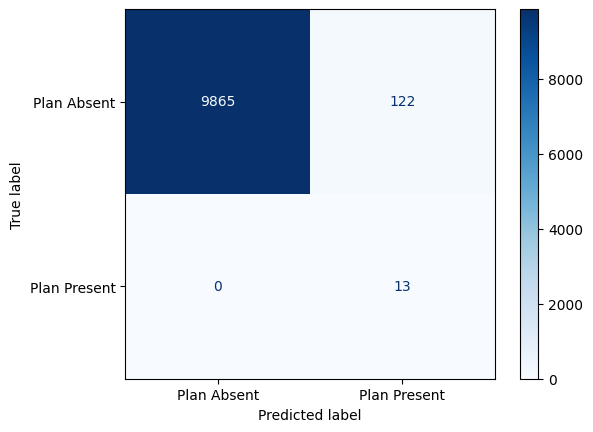

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Plan Absent", "Plan Present"])
disp.plot(cmap="Blues")
plt.show()

Imbalaced Data for planning

In [37]:
# Check for 


from IPython.display import clear_output

stemmer = PorterStemmer()

merged_df_shuffled = merged_df_planning.sample(frac=1, random_state=42)

y_true = []
y_pred = []
cap_id = []

x=0
count = 0
#cats = dict()
for i in merged_df_shuffled['Primary_ID'][:10000]:
    #print("\n")
    #clear_output(wait=True)
    x+=1
    print(x)
    sen = str(merged_df_shuffled[merged_df_shuffled['Primary_ID']==i]["summary"])
    #print(sen)
    cat = str("planning")
    #print(cat)
    re_sub = re.sub('[^a-zA-Z]',' ',sen)
    re_cat = re.sub('[^a-zA-Z]',' ',cat)
    #print(re_cat)
    re_sub = re_sub.lower()
    #re_cat = re_cat.lower()
    re_sub = re_sub.split()
    #re_cat = re_cat.split()
    re_sub = [stemmer.stem(word)+" " for word in re_sub if word not in stopwords.words('english')]
    re_cat = stemmer.stem(re_cat)
    re_sub = ','.join(map(str, re_sub))
    #re_cat = ','.join(map(str, re_cat[0:-4]))
    #print(re_sub.find(re_cat))
    #print(re_sub)
    re_cat = re_cat+" "
    #print(re_sub)
    #print(re_cat)
    if re_cat in re_sub:
        y_pred.append(1)
    else:
        y_pred.append(0)
    #print(y_pred)
    y_true.append(int(merged_df_shuffled[merged_df_shuffled['Primary_ID']==i]['plan'].values[0]))
    #print(y_true)
    if y_pred[-1] != y_true[-1]:
        print(re_sub)
        print(re_cat)
        cap_id.append(i)
        print(cap_id)
    count+=1

print("Total Count :",count)
print("y_true : ",y_true)
print("y_pred : ",y_pred)
print("Wrongly predicted/marked IDs : ",cap_id)

    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
intern ,busi ,machin ,corpor ,name ,summari ,dtype ,object 
plan 
['66404281-50d7-4104-8efd-b28b0e8a2b1d']
118
119
120
121
122
123
124
125
126
127
128
129
130
131
aditya ,birla ,fashion ,retail ,limit ,pla ,name ,summari ,dtype ,object 
plan 
['66404281-50d7-4104-8efd-b28b0e8a2b1d', '0882f0f4-1661-4106-a15d-cd29144a234d']
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210


In [39]:
from IPython.display import clear_output
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

merged_df_shuffled = merged_df_planning.sample(frac=1, random_state=42)

y_true = []
y_pred = []
cap_id = []

x = 0
count = 0

for i in merged_df_shuffled['Primary_ID'][:10000]:
    # clear_output(wait=True)   # optional, slows it down
    x += 1
    print("\n--- Row:", x, "---")

    # Grab the sentence and category
    sen = str(merged_df_shuffled.loc[merged_df_shuffled['Primary_ID'] == i, "summary"].values[0])
    cat = "planning"

    print("Original sentence:", sen)
    print("Category:", cat)

    # Clean text
    re_sub = re.sub(r'[^a-zA-Z]', ' ', sen).lower().split()
    re_cat = re.sub(r'[^a-zA-Z]', ' ', cat).lower().split()

    # Stem words
    re_sub = [stemmer.stem(word) for word in re_sub if word not in stop_words]
    re_cat = [stemmer.stem(word) for word in re_cat]

    # Convert to strings
    re_sub = " ".join(re_sub)
    re_cat = " ".join(re_cat)

    print("Processed sentence:", re_sub)
    print("Processed category:", re_cat)

    # Check match
    if re_cat in re_sub:
        y_pred.append(1)
    else:
        y_pred.append(0)

    print("Prediction for row:", y_pred[-1])

    # Ground truth
    true_val = int(merged_df_shuffled.loc[merged_df_shuffled['Primary_ID'] == i, 'plan'].values[0])
    y_true.append(true_val)
    print("True label:", true_val)

    # Wrong predictions tracker
    if y_pred[-1] != y_true[-1]:
        print("❌ Mismatch found")
        print("Sentence:", re_sub)
        print("Category:", re_cat)
        cap_id.append(i)
        print("Wrongly predicted IDs so far:", cap_id)

    count += 1

print("\n==== FINAL REPORT ====")
print("Total Count:", count)
print("y_true:", y_true)
print("y_pred:", y_pred)
print("Wrongly predicted/marked IDs:", cap_id)



--- Row: 1 ---
Original sentence: BOE is planning to sign new client Apple.
Category: planning
Processed sentence: boe plan sign new client appl
Processed category: plan
Prediction for row: 1
True label: 1

--- Row: 2 ---
Original sentence: Tridonic GmbH & Co KG is planning to launch digital technology for connected light in North America.
Category: planning
Processed sentence: tridon gmbh co kg plan launch digit technolog connect light north america
Processed category: plan
Prediction for row: 1
True label: 1

--- Row: 3 ---
Original sentence: Flint Hills Resources is planning to invest into assets: fuel terminal in the amount of $20M.
Category: planning
Processed sentence: flint hill resourc plan invest asset fuel termin amount
Processed category: plan
Prediction for row: 1
True label: 1

--- Row: 4 ---
Original sentence: Amazon.com, Inc. is planning to expand facilities to Singapore, Singapore.
Category: planning
Processed sentence: amazon com inc plan expand facil singapor singapo

d:\Anaconda\envs\ar\lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (2).

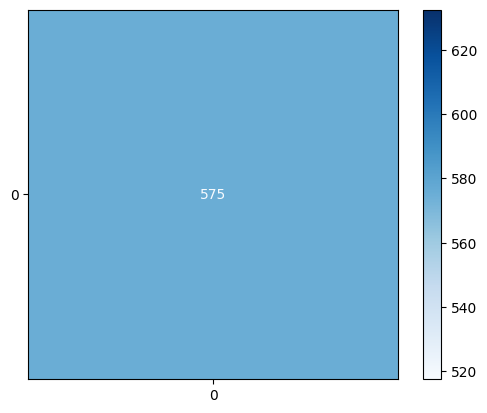

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Plan Absent", "Plan Present"])
disp.plot(cmap="Blues")
plt.show()

In [68]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 612910 entries, 0 to 620784
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Primary_ID                                  612910 non-null  object        
 1   summary                                     612910 non-null  object        
 2   category                                    612910 non-null  object        
 3   found_at                                    612910 non-null  object        
 4   confidence                                  612902 non-null  float64       
 5   article_sentence                            612910 non-null  object        
 6   human_approved                              612910 non-null  bool          
 7   planning                                    612910 non-null  bool          
 8   amount                                      41287 non-null   object        
 9 

In [65]:
# checking the null values count for each feature

merged_df.isnull().sum()

Primary_ID                                         0
summary                                            0
category                                           0
found_at                                           0
confidence                                         8
article_sentence                                   0
human_approved                                     0
planning                                           0
amount                                        571623
amount_normalized                             571627
assets                                        597248
assets_tags                                        0
award                                         593924
contact                                       524634
effective_date                                     0
event                                         594343
financing_type                                602468
financing_type_normalized                     610462
financing_type_tags                           

In [66]:
# making a list of features which have missing values

features_missing_data = [features for features in merged_df.columns if merged_df[features].isnull().sum()>0]
print(" features_missing_data : ",len(features_missing_data))
features_missing_data

 features_missing_data :  26


['confidence',
 'amount',
 'amount_normalized',
 'assets',
 'award',
 'contact',
 'event',
 'financing_type',
 'financing_type_normalized',
 'job_title',
 'location',
 'product',
 'product_data.full_text',
 'product_data.name',
 'product_data.release_type',
 'product_data.release_version',
 'product_data.fuzzy_match',
 'recognition',
 'vulnerability',
 'relationships.company1.data.id',
 'relationships.company1.data.type',
 'relationships.company2.data.id',
 'relationships.company2.data.type',
 'domain',
 'company_name',
 'ticker']

In [67]:
# calculating the percentage of missing values in each features_missing_data

above_90_missing = []
below_5_missing = []

for feature in features_missing_data:
    print(feature.ljust(40),np.round((merged_df[feature].isnull().mean())*100,4), '% missing values')

    if np.round((merged_df[feature].isnull().mean())*100,4) > 90.0:
        above_90_missing.append(feature)

    if np.round((merged_df[feature].isnull().mean())*100,4) < 5.0:
        below_5_missing.append(feature)

print("Features missing more than 80 percent datapoints : ",above_90_missing)
print("Features missing less than 5 percent datapoints : ",below_5_missing)


confidence                               0.0013 % missing values
amount                                   93.2638 % missing values
amount_normalized                        93.2644 % missing values
assets                                   97.4446 % missing values
award                                    96.9023 % missing values
contact                                  85.5972 % missing values
event                                    96.9707 % missing values
financing_type                           98.2963 % missing values
financing_type_normalized                99.6006 % missing values
job_title                                88.3934 % missing values
location                                 72.5632 % missing values
product                                  63.9689 % missing values
product_data.full_text                   63.9791 % missing values
product_data.name                        97.5349 % missing values
product_data.release_type                95.6246 % missing values
product_dat

We can drop the columns missing more than 90% data. Though keeping it here coz it may need further analysis.

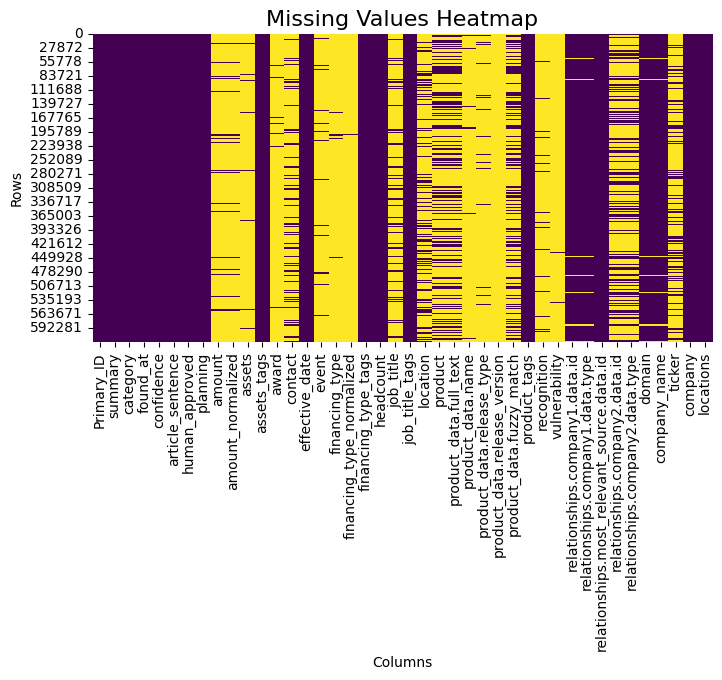

In [68]:
# Set figure size
plt.figure(figsize=(8, 4))

# Create a heatmap of missing values
sns.heatmap(merged_df.isnull(), cbar=False, cmap='viridis')

plt.title("Missing Values Heatmap", fontsize=16)
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

Replacing Missing Value

Since 'confidence' just has 0.0013% data missing, we can replace the missing values

As its a numerical field, we need to find its distribution to fillup data.

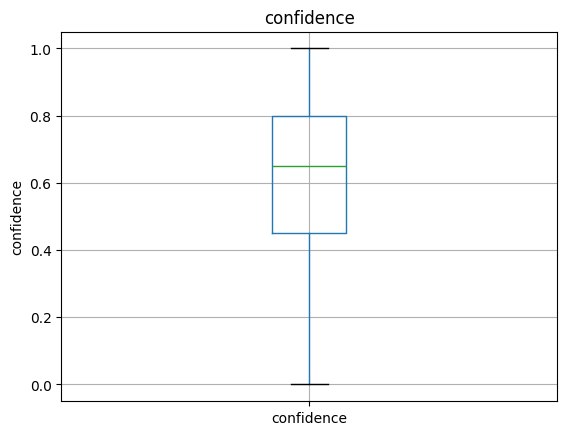

In [69]:
# Checking for outliers

merged_df.boxplot(column='confidence')
plt.ylabel("confidence")
plt.title("confidence")
plt.show()

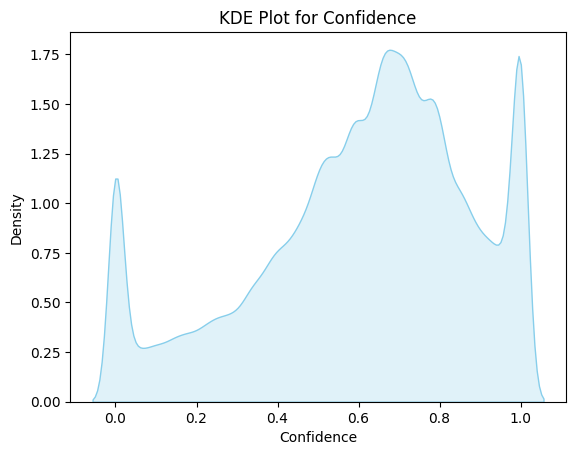

In [70]:
# making a kde plot 

sns.kdeplot(data=merged_df, x='confidence', fill=True, color="skyblue")
plt.title(f"KDE Plot for Confidence")
plt.xlabel('Confidence')
plt.ylabel("Density")
plt.show()

The data seems to unevenly distributed. Using Min-Max scalar for normalizing the data.

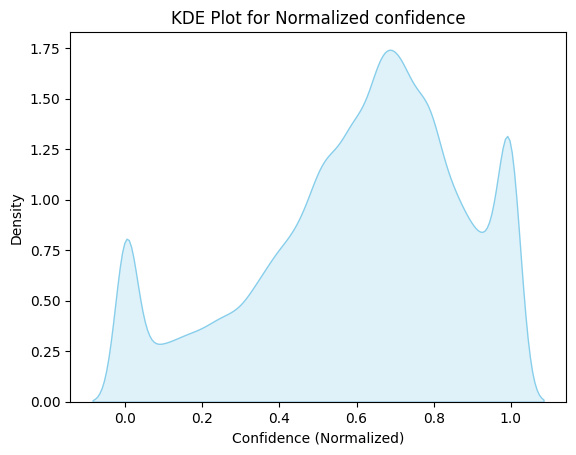

In [71]:
# Min-Max normalization

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
merged_df[f"confidence_normalized"] = scaler.fit_transform(merged_df[['confidence']])


# KDE plot of normalized data

sns.kdeplot(data=merged_df, x=f"confidence_normalized", fill=True, color="skyblue", bw_adjust=1.5)
plt.title(f"KDE Plot for Normalized confidence")
plt.xlabel(f"Confidence (Normalized)")
plt.ylabel("Density")
plt.show()

The distribution seems to be left skewed with some variance. Using Median for value replacement.

In [72]:
# Assigning Nan to non numbers
merged_df["confidence"] = pd.to_numeric(merged_df["confidence"], errors="coerce")

# Using median to fill up missing values
merged_df['confidence'] = merged_df['confidence'].fillna(merged_df['confidence'].median())

print(merged_df['confidence'].isnull().sum())

0


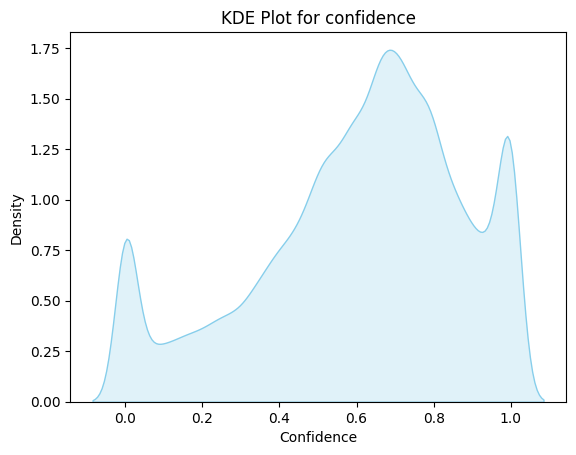

In [73]:
# KDE plot

sns.kdeplot(data=merged_df, x=f"confidence", fill=True, color="skyblue", bw_adjust=1.5)
plt.title(f"KDE Plot for confidence")
plt.xlabel(f"Confidence")
plt.ylabel("Density")
plt.show()

In [74]:
# Dropping 'confidence_normalized' from the df

merged_df.drop(columns=['confidence_normalized'],inplace=True)

Maintains the distribution

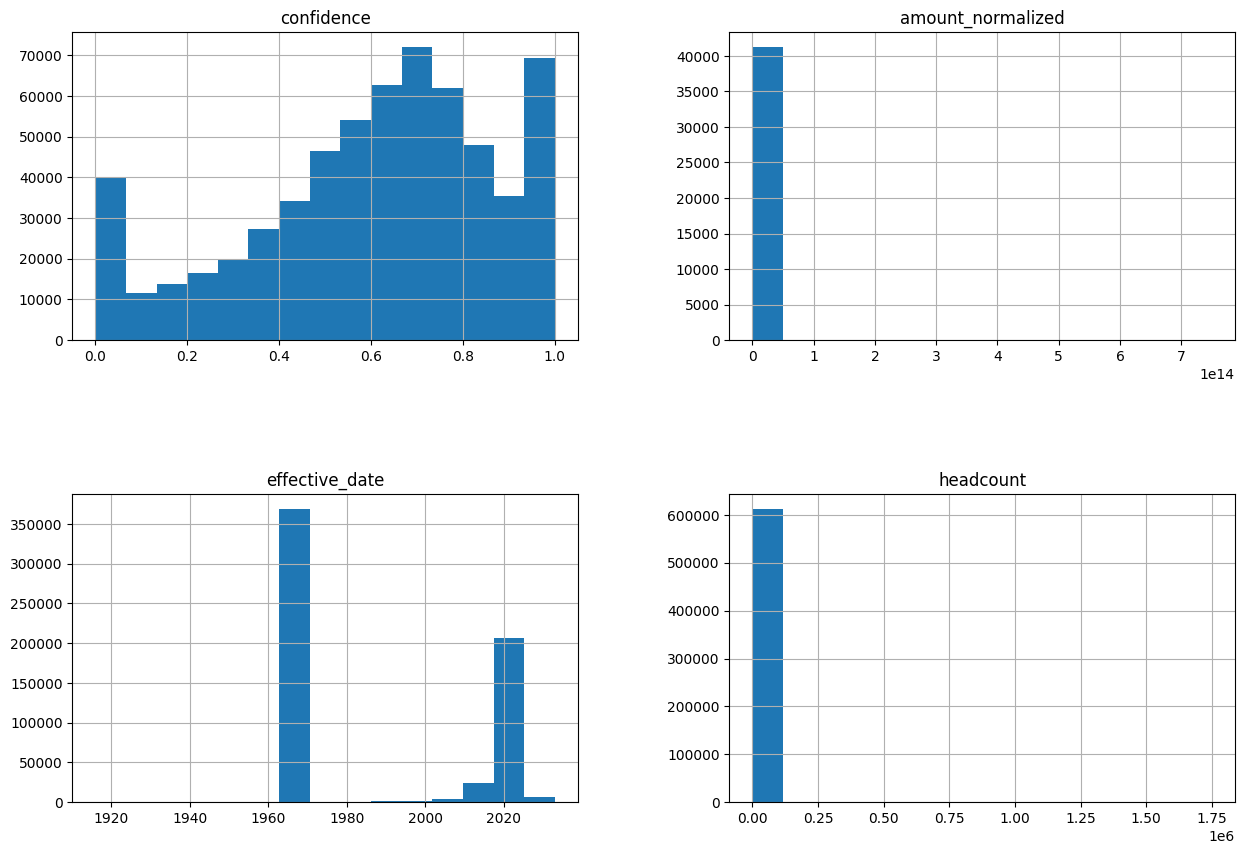

In [75]:
# plotting data distribution for each feature

axes = merged_df.hist(bins=15, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
plt.show()

Confidence is mostly within range 0.5 to 1.0

In [76]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 612910 entries, 0 to 620784
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Primary_ID                                  612910 non-null  object        
 1   summary                                     612910 non-null  object        
 2   category                                    612910 non-null  object        
 3   found_at                                    612910 non-null  object        
 4   confidence                                  612910 non-null  float64       
 5   article_sentence                            612910 non-null  object        
 6   human_approved                              612910 non-null  bool          
 7   planning                                    612910 non-null  bool          
 8   amount                                      41287 non-null   object        
 9 

### Numerical Features

In [77]:
# listing numerical features (except for IDs)

numerical_features = [feature
                      for feature in merged_df.columns
                      if merged_df[feature].dtype!='O'
                      and '_id' not in feature.lower()]

print("Count of Numerical Features : ", len(numerical_features))
merged_df[numerical_features].dtypes



Count of Numerical Features :  6


confidence                  float64
human_approved                 bool
planning                       bool
amount_normalized           float64
effective_date       datetime64[ns]
headcount                     int64
dtype: object

However, we cant treat datetime as numerical variable

In [78]:
# Date Variable

date_feature = [feature
                for feature in numerical_features
                if 'date' in feature.lower()]

date_feature

['effective_date']

In [79]:
# Analyzing date variable

for feature in date_feature:
    print("For ",feature)
    print("Total Dates : ", len(merged_df[feature]))
    print("Unique Dates : ", len(merged_df[feature].unique()))
    print(merged_df[feature].unique())

For  effective_date
Total Dates :  612910
Unique Dates :  5562
<DatetimeArray>
['1970-01-01 00:00:00', '2018-01-01 00:00:00', '2022-06-28 00:00:00',
 '2022-04-13 00:00:00', '2022-01-01 00:00:00', '2024-07-23 00:00:00',
 '2023-03-22 00:00:00', '2024-11-18 00:00:00', '2025-02-05 00:00:00',
 '2015-09-03 00:00:00',
 ...
 '2025-10-29 00:00:00', '2014-02-09 00:00:00', '1996-02-07 00:00:00',
 '2016-02-06 00:00:00', '2011-11-18 00:00:00', '2010-11-08 00:00:00',
 '2002-07-11 00:00:00', '2015-02-13 00:00:00', '2008-06-04 00:00:00',
 '1984-01-28 00:00:00']
Length: 5562, dtype: datetime64[ns]


Dividing Numerical data into Discrete and Continuous for better overview

In [80]:
# Discrete Features ( considering features with less than 5 unique datapoints)

discrete_features = [feature
                     for feature in numerical_features
                     if len(merged_df[feature].unique())<5 and feature not in date_feature]


print("Count of Discrete Features : ",len(discrete_features))
print(discrete_features)

Count of Discrete Features :  2
['human_approved', 'planning']


In [81]:
merged_df[discrete_features].head(5)

,human_approved,planning
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


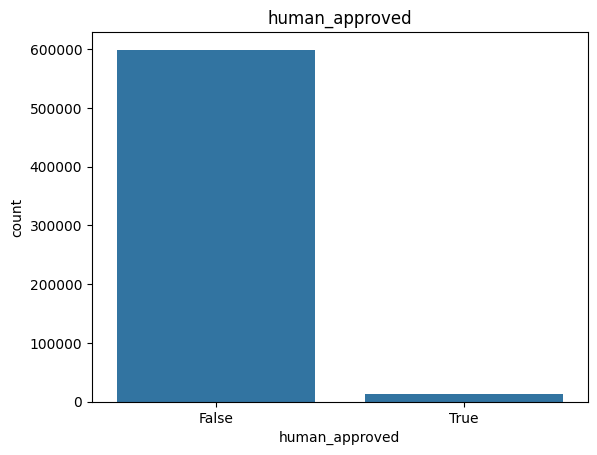

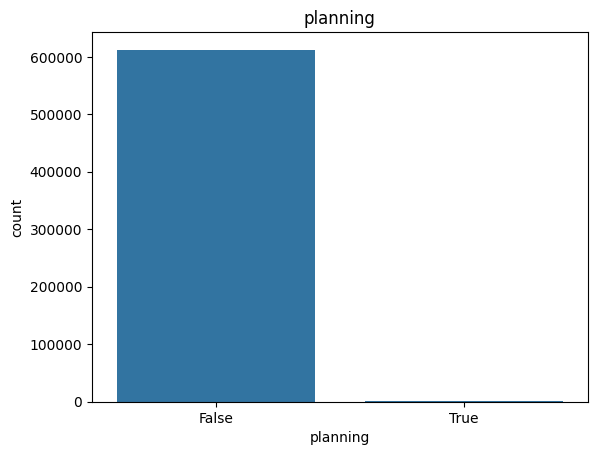

In [82]:
for feature in discrete_features:
    sns.countplot(data=merged_df, x=feature)
    #plt.xticks(rotation=45)
    plt.title(feature)
    plt.show()

In [83]:
# Continuous Features

continuous_features = [feature
                      for feature in numerical_features
                      if feature not in date_feature + discrete_features]

print("Count of Continuous Features : ",len(continuous_features))
print(continuous_features)

Count of Continuous Features :  3
['confidence', 'amount_normalized', 'headcount']


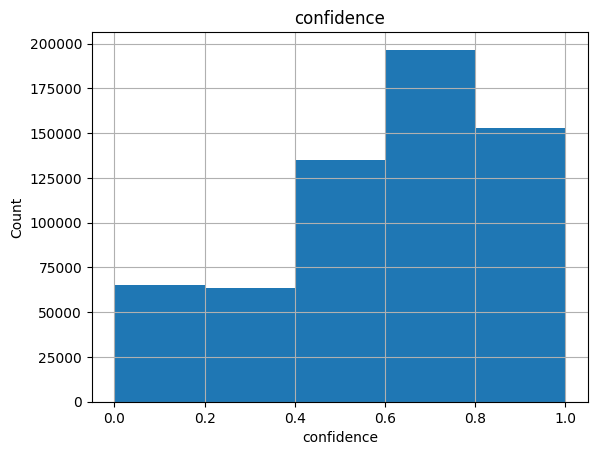

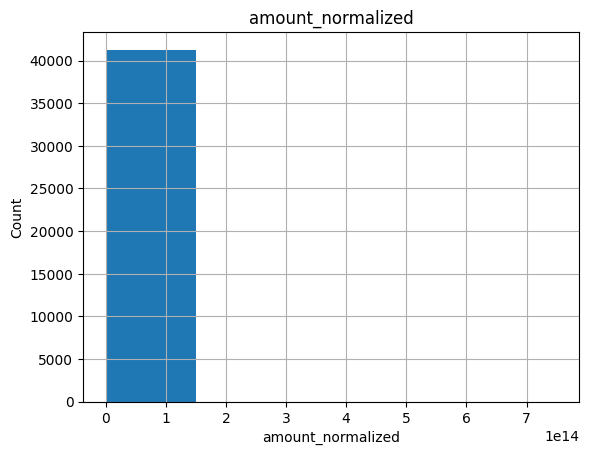

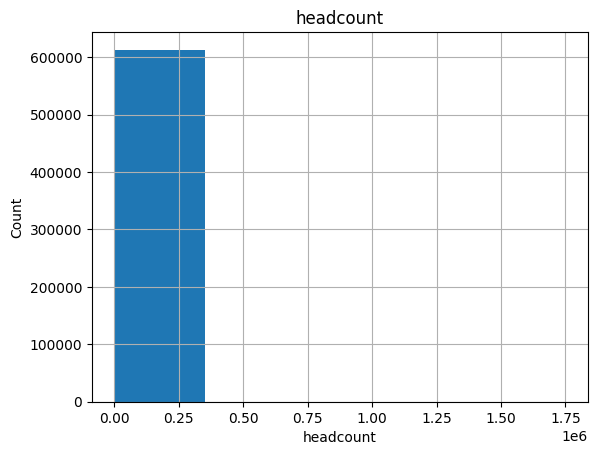

In [84]:
# Analyzing continuous features

for feature in continuous_features:
    data = merged_df.copy()
    data[feature].hist(bins=5)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [85]:
merged_df[numerical_features].corr()

,confidence,human_approved,planning,amount_normalized,effective_date,headcount
confidence,1.000000,0.000146,0.017727,0.005819,-0.008605,-0.000558
human_approved,0.000146,1.000000,0.089813,0.009507,-0.001062,0.000468
planning,0.017727,0.089813,1.000000,-0.000200,-0.011709,0.003296
amount_normalized,0.005819,0.009507,-0.000200,1.000000,-0.005763,-0.000052
effective_date,-0.008605,-0.001062,-0.011709,-0.005763,1.000000,0.005399
headcount,-0.000558,0.000468,0.003296,-0.000052,0.005399,1.000000


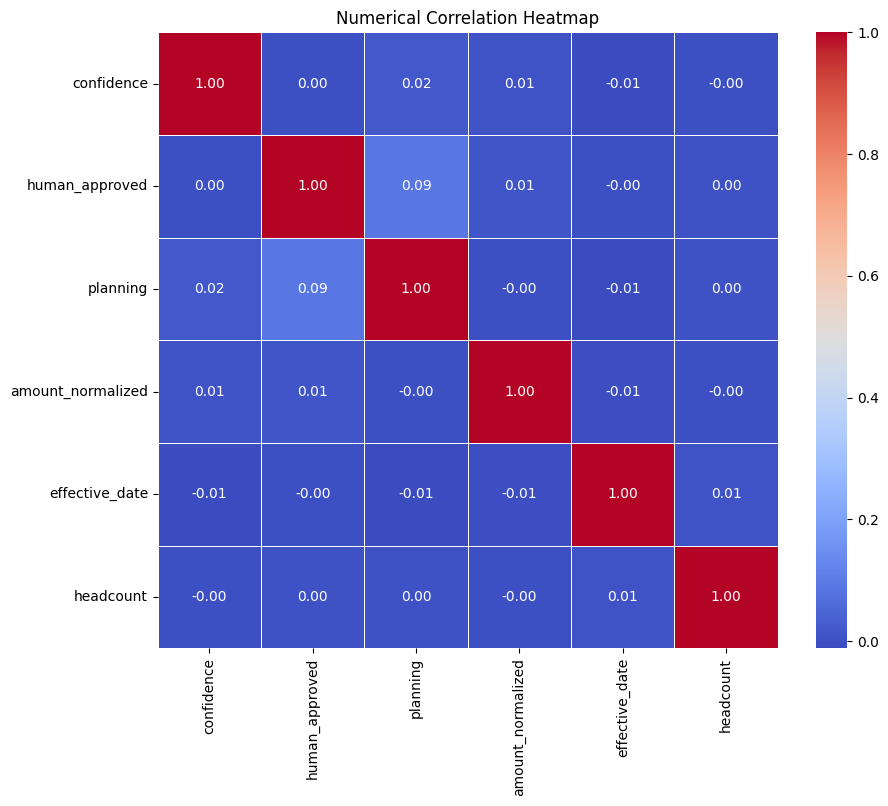

In [86]:
# plotting heatmap to understand numerical features correlations visually

plt.figure(figsize=(10, 8))
sns.heatmap(merged_df[numerical_features].corr(), 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f",
            linewidths=.5)
plt.title('Numerical Correlation Heatmap')
plt.show()

### Categorical Features

In [87]:
categorical_features = [feature
                        for feature in merged_df.columns
                        if merged_df[feature].dtypes == 'O']

print("Count of Categorical Features : ",len(categorical_features))
print(merged_df[categorical_features].dtypes)

Count of Categorical Features :  36
Primary_ID                                    object
summary                                       object
category                                      object
found_at                                      object
article_sentence                              object
amount                                        object
assets                                        object
assets_tags                                   object
award                                         object
contact                                       object
event                                         object
financing_type                                object
financing_type_normalized                     object
financing_type_tags                           object
job_title                                     object
job_title_tags                                object
location                                      object
product                                       object
product_da

In [88]:
merged_df[categorical_features].head(5)

,Primary_ID,summary,category,found_at,article_sentence,amount,assets,assets_tags,award,contact,...,relationships.company1.data.id,relationships.company1.data.type,relationships.most_relevant_source.data.id,relationships.company2.data.id,relationships.company2.data.type,domain,company_name,ticker,company,locations
0,0020f127-3470-4cce-8989-1c79f45da217,Unipart Manufacturing Group recognized as Tran...,recognized_as,2022-07-10T20:00:00Z,In addition to being named the safest organisa...,None,None,,None,None,...,000bd323-1bf8-5c7a-9941-e6c155c29d10,company,d172abc1-3755-4cef-946e-7de944806e7d,NaN,NaN,unipart.com,Unipart Manufacturing Group,None,Unipart Manufacturing Group,United Kingdom
1,009be1ff-6cfb-4e9f-a415-69baf71f47f3,OOS International received award two safety aw...,receives_award,2019-12-19T10:45:17Z,Since then OOS International has been an activ...,None,None,,two safety awards,None,...,000ff896-4292-5b15-9c81-8bf4d76c10d7,company,58c0d5fd-068d-4bab-8ac4-47e19bbdf091,NaN,NaN,oosinternational.com,OOS International,None,OOS International,
2,01444124-7375-4f03-8879-eb8200b31504,NWN Corporation received award Global Winner f...,receives_award,2022-07-12T20:00:00Z,"As a result, with nearly 400 nominees from ove...",None,None,,"Global Winner for 2022 Microsoft Meetings, Cal...",None,...,000d8a9c-882c-57f2-8b4c-2afc786d0fa1,company,ef330a38-8624-41c1-8b75-d1b96e7dbd45,NaN,NaN,nwncarousel.com,NWN Corporation,None,NWN Corporation,
3,031a304c-29ca-415e-a815-e9c915896540,Grape Solutions Plc. is developing Mobiliti ap...,is_developing,2023-04-02T22:00:00Z,MVM Mobiliti and Grape Solutions have been wor...,None,None,,None,None,...,0008b75f-9d15-54ae-b70a-52301945e397,company,0525807d-6ff6-44a0-9c36-8be3afceba5b,NaN,NaN,grape.solutions,Grape Solutions Plc.,None,Grape Solutions Plc,Hungary
4,037783ca-f3f7-4782-8a81-df3cae1ac936,"NWN Corporation launched two new kits, At-Home...",launches,2022-04-13T01:02:36Z,"NWN Carousel, the leading integrated cloud com...",None,None,office,None,None,...,000d8a9c-882c-57f2-8b4c-2afc786d0fa1,company,16061c55-111d-496a-9e3e-837dddc3454b,NaN,NaN,nwncarousel.com,NWN Corporation,None,NWN Corporation,


In [89]:
# considering unique values for categorical features as categories
# determining the number of categories for each categorical feature

print("Features".ljust(35),"Categories")

for feature in categorical_features:
    print(f'{feature.ljust(40)} {len(merged_df[feature].unique())}')

Features                            Categories
Primary_ID                               612910
summary                                  603796
category                                 29
found_at                                 384036
article_sentence                         589468
amount                                   11113
assets                                   10146
assets_tags                              156
award                                    16537
contact                                  72594
event                                    15278
financing_type                           1211
financing_type_normalized                29
financing_type_tags                      34
job_title                                33592
job_title_tags                           1039
location                                 13643
product                                  203977
product_data.full_text                   205545
product_data.name                        14026
product_data.release

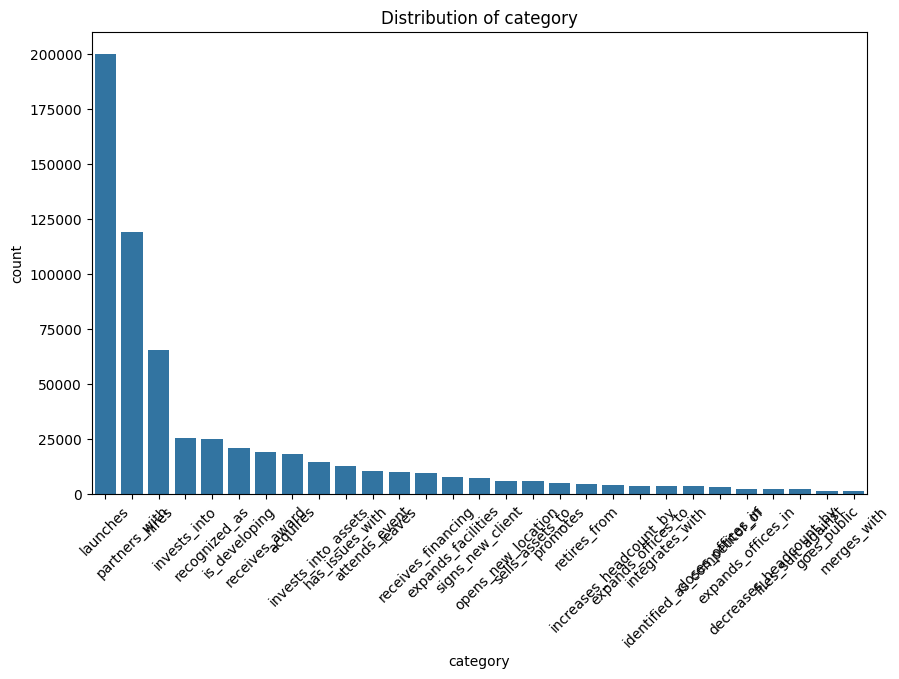

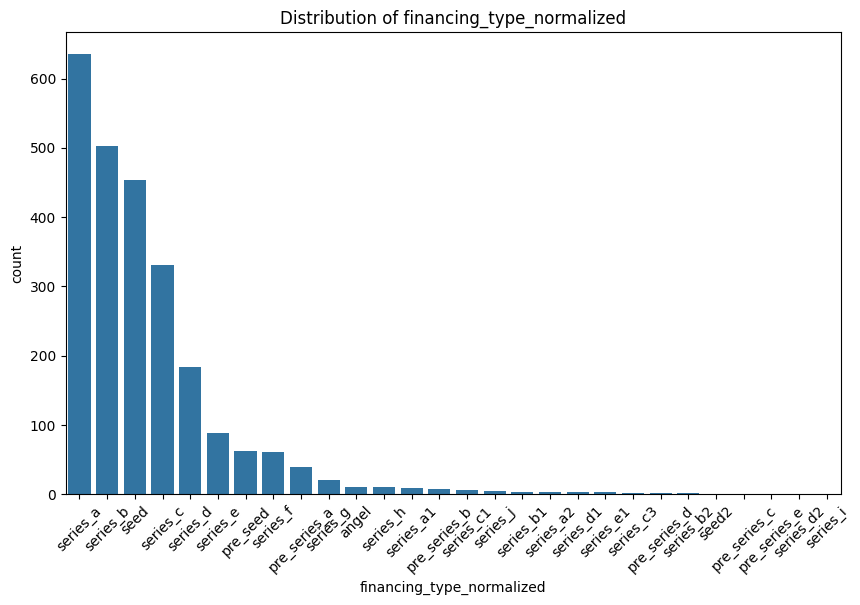

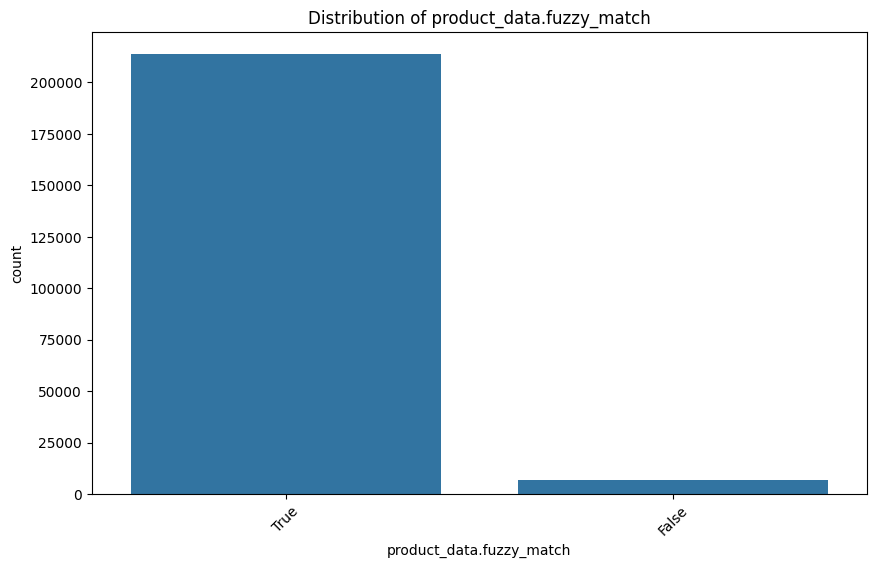

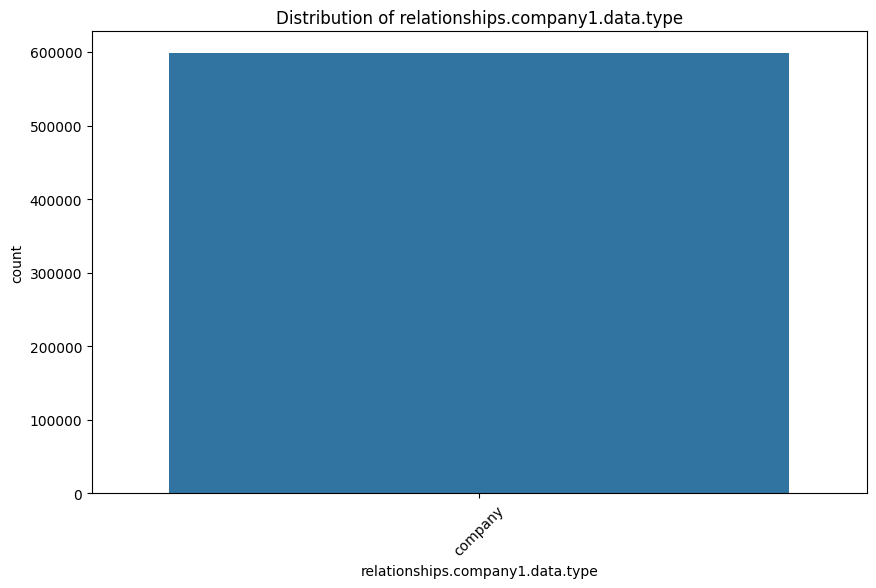

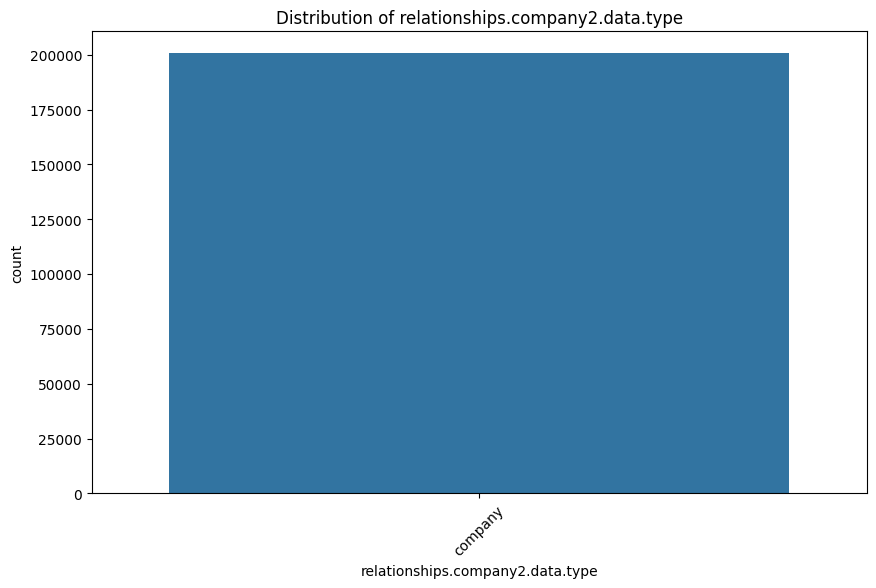

In [91]:
for feature in categorical_features:
    if len(merged_df[feature].unique())<30:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=merged_df, x=feature, order=merged_df[feature].value_counts().index)
        plt.xticks(rotation=45)
        plt.title(f'Distribution of {feature}')
        plt.show()

                              summary
company_name                         
Amazon.com, Inc.                13888
Apple                            9162
Asus                             3592
Hyundai                          2473
Marvel Studios                   2441
Binance Labs                     2312
Citigroup                        2157
ABB Inc                          1709
Marriott International, Inc.     1579
LG                               1577


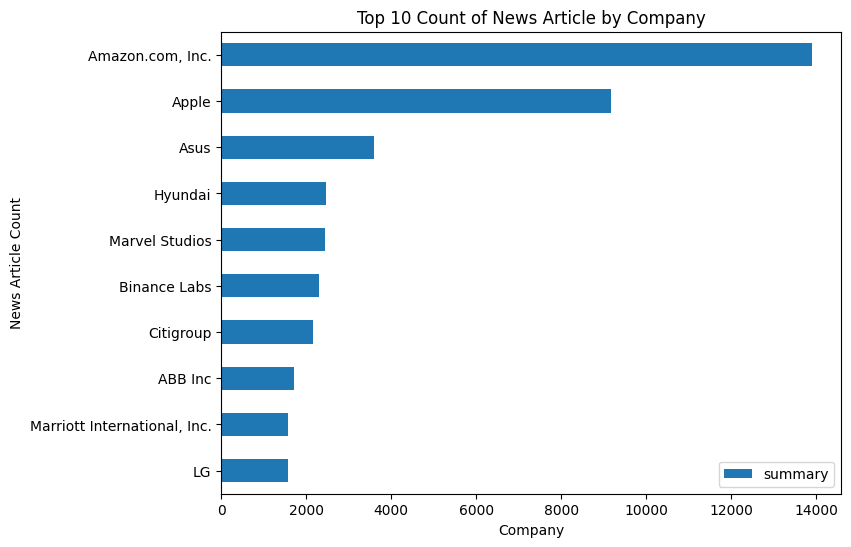

In [92]:
pivot_df = merged_df.pivot_table(index='company_name',values='summary',aggfunc='count').sort_values(by=['summary'],ascending=False).head(10)

print(pivot_df)

pivot_df[::-1].plot(kind='barh', figsize=(8, 6))
plt.title('Top 10 Count of News Article by Company')
plt.ylabel('News Article Count')
plt.xlabel('Company')
plt.show()

                              award
company_name                       
Amazon.com, Inc.                 66
Hyundai                          56
Infosys Limited                  53
LG                               53
University of Texas              52
Wipro                            52
Subaru                           51
Marriott International, Inc.     48
UAB group                        47
Tata Steel                       46


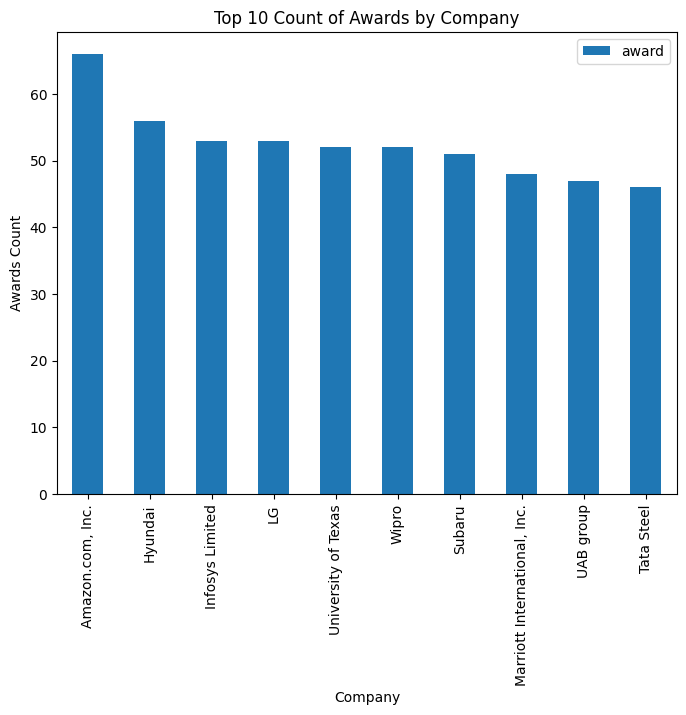

In [93]:
pivot_df = merged_df.pivot_table(index='company_name',values='award',aggfunc='count').sort_values(by=['award'],ascending=False).head(10)

print(pivot_df)

pivot_df.plot(kind='bar', figsize=(8, 6))
plt.title('Top 10 Count of Awards by Company')
plt.ylabel('Awards Count')
plt.xlabel('Company')
plt.show()

                confidence
domain                    
amazon.com       9804.6527
apple.com        6711.2441
asus.com         2309.9904
hyundaiusa.com   1444.9602
marvel.com       1402.7621
binance.com      1397.9978
citigroup.com    1323.3053
abb.com          1068.8895
canada.ca        1022.8378
jll.com          1009.2613


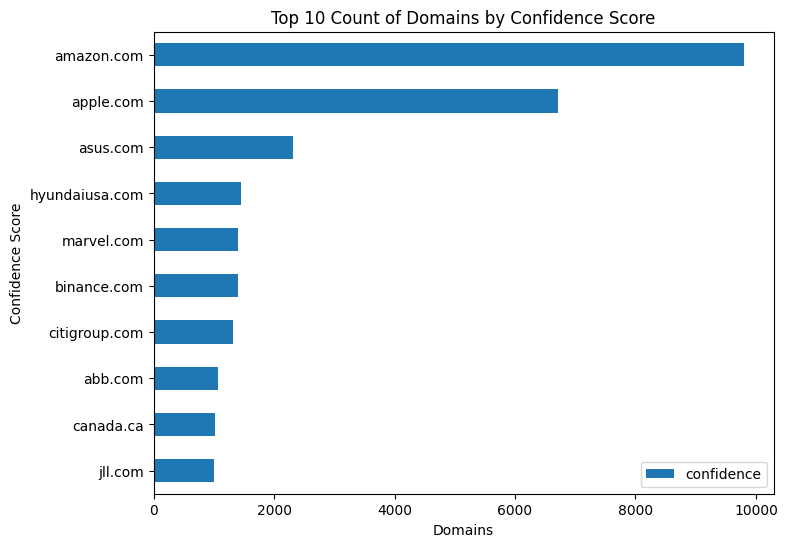

In [99]:
# Confidence Scores as per Domains

pivot_df = merged_df.pivot_table(index='domain',values='confidence',aggfunc='sum').sort_values(by=['confidence'],ascending=False).head(10)

print(pivot_df)

pivot_df[::-1].plot(kind='barh', figsize=(8, 6))
plt.title('Top 10 Count of Domains by Confidence Score')
plt.ylabel('Confidence Score')
plt.xlabel('Domains')
plt.show()

In [100]:
print("Before modification : ",merged_df['found_at'].dtype)

from datetime import datetime

merged_df['found_at'] = pd.to_datetime(merged_df['found_at'],utc=True)

print("After modification : ",merged_df['found_at'].dtype)

Before modification :  object
After modification :  datetime64[ns, UTC]


C:\Users\gaura\AppData\Local\Temp\ipykernel_24672\1662023548.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  merged_df.loc[:,'Month'] = merged_df['found_at'].dt.to_period('M')


Month
2010-01       8
2010-02       5
2010-03      11
2010-04       7
2010-05      14
           ... 
2025-03    8372
2025-04    6692
2025-05    6327
2025-06    5394
2025-07     518
Freq: M, Length: 187, dtype: int64


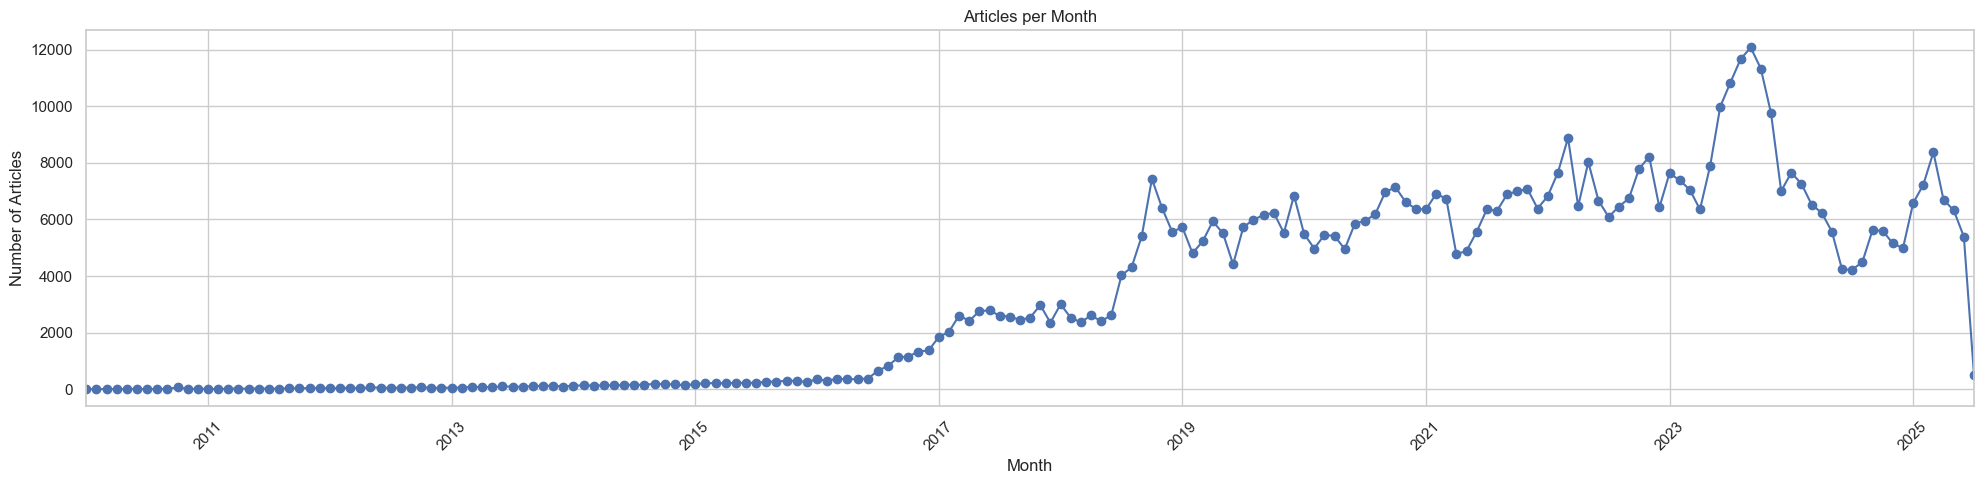

In [106]:
# detecting article trends

merged_df.loc[:,'Month'] = merged_df['found_at'].dt.to_period('M')

monthly_counts = merged_df.groupby('Month').size()

print(monthly_counts)

monthly_counts.plot(kind='line', marker='o', figsize=(20,5), title='Articles per Month')
plt.xlabel("Month")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [108]:
# Dropping Month Column

merged_df.drop(columns=['Month'],inplace=True)

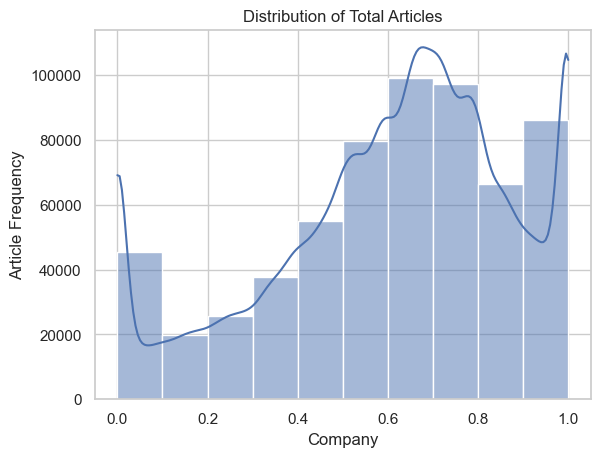

In [109]:
# Confidence

sns.histplot(merged_df['confidence'], kde=True, bins=10)
plt.title("Distribution of Total Articles")
plt.xlabel("Company")
plt.ylabel("Article Frequency")
plt.show()

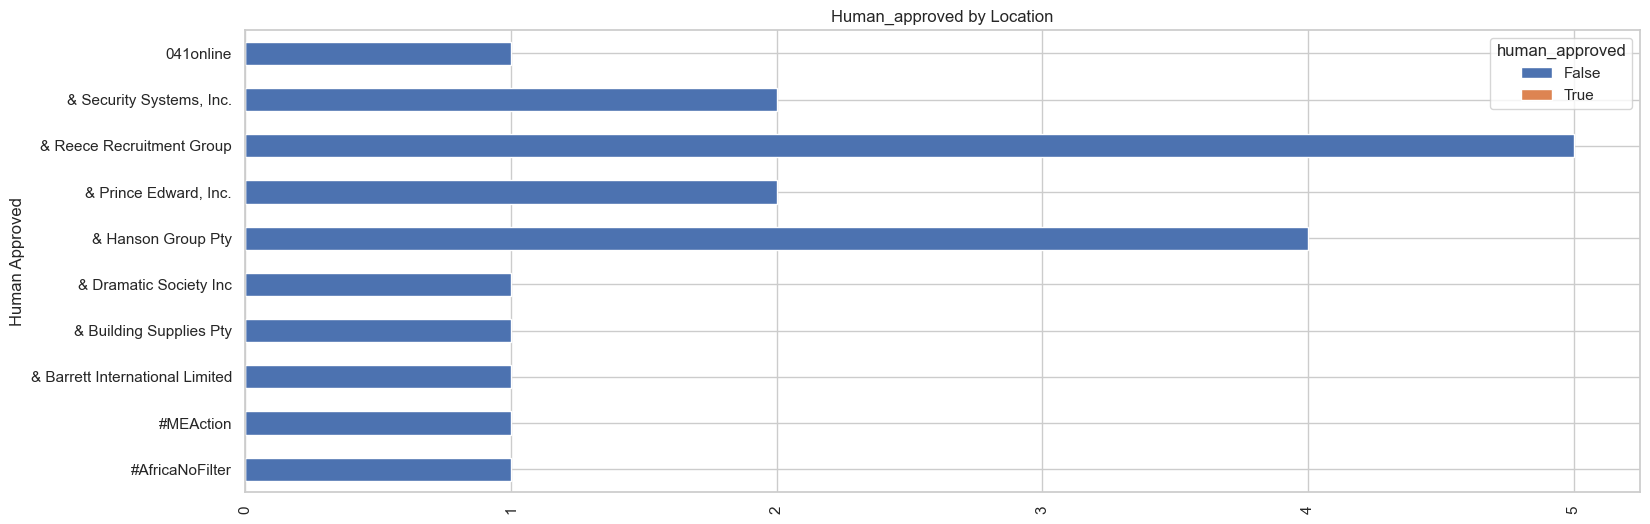

In [110]:
# location

cross = pd.crosstab(merged_df['company_name'], merged_df['human_approved'])
cross.head(10).plot(kind='barh', stacked=True, figsize=(18,6))
plt.title("Human_approved by Location")
plt.ylabel("Human Approved")
plt.xticks(rotation=90)
plt.show()

assets_tags
                            555499
education                    12823
research_and_development      8574
it                            7275
production                    6340
hospitality                   3754
retail                        3366
transportation                3148
energy                        2455
distribution                  2279
Name: count, dtype: int64


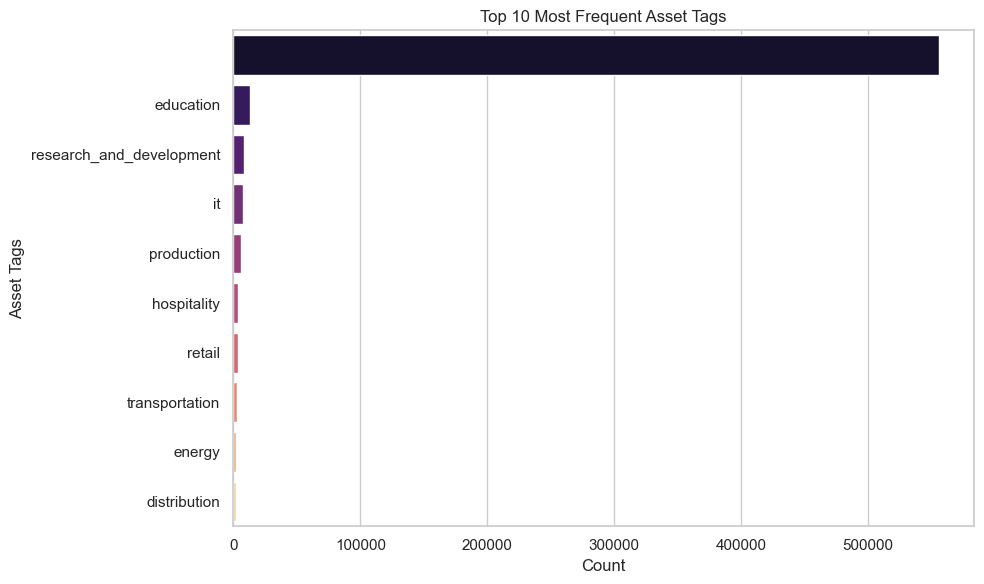

In [111]:
top_asset_tags = merged_df['assets_tags'].value_counts().nlargest(10)

print(top_asset_tags)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_asset_tags.values, y=top_asset_tags.index,palette='magma', hue=top_asset_tags.index, legend=False)
plt.title('Top 10 Most Frequent Asset Tags')
plt.xlabel('Count')
plt.ylabel('Asset Tags')
plt.tight_layout()
plt.show()

location
United States                        10290
United Kingdom                        8532
India                                 6233
Australia                             5173
New York, New York, United States     2795
London, United Kingdom                2259
China                                 1930
Canada                                1820
California, United States             1719
Singapore, Singapore                  1705
Name: count, dtype: int64


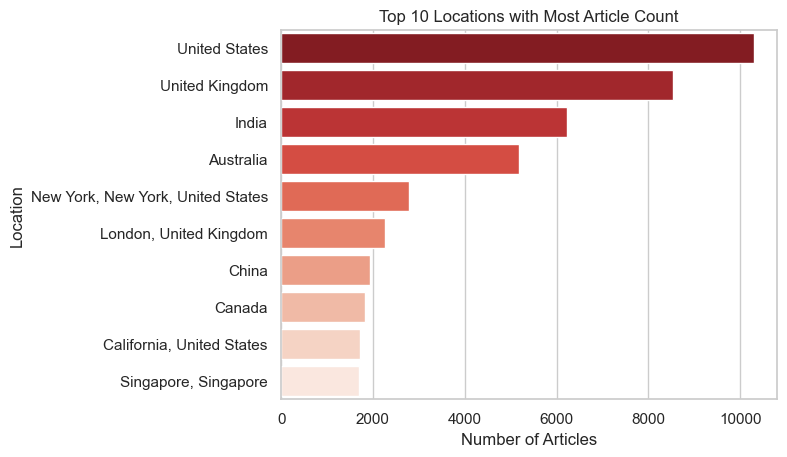

In [112]:
# Location x Article Count

top_locations = merged_df['location'].value_counts().head(10)

print(top_locations)

sns.barplot(y=top_locations.index, x=top_locations.values, palette="Reds_r", hue=top_locations.index, legend=False)
plt.title("Top 10 Locations with Most Article Count")
plt.xlabel("Number of Articles")
plt.ylabel("Location")
plt.show()

### SQL Connection

In [ ]:
import pymysql

# Your existing DataFrame
# df = your_dataframe

# MySQL connection details
user = "root"
password = ""
host = "localhost"
port = 3306
database = "article_db"

# Mapping Pandas dtypes to MySQL types
dtype_mapping = {
    'int64': 'BIGINT',
    'float64': 'DOUBLE',
    'object': 'TEXT',
    'datetime64[ns]': 'DATETIME',
    'datetime64[ns, UTC]': 'DATETIME',
    'bool': 'BOOLEAN'
}


In [150]:
# Generate CREATE TABLE DDL from DataFrame
table_name = "news_article_table"
columns = []

for col_name, dtype in df.dtypes.items():
    mysql_type = dtype_mapping.get(str(dtype), 'TEXT')
    columns.append(f"`{col_name}` {mysql_type}")

create_table_query = f"CREATE TABLE IF NOT EXISTS `{table_name}` (\n    {', '.join(columns)}\n);"

In [151]:
# Connect to MySQL and execute DDL
conn = pymysql.connect(host=host, user=user, password=password, database=database, port=port)
cursor = conn.cursor()
cursor.execute(create_table_query)
conn.commit()

print(f"✅ Table `{table_name}` created successfully!")


✅ Table `news_article_table` created successfully!


In [152]:
for col in merged_df.columns:
    if merged_df[col].dtype == 'object':
        merged_df[col] = merged_df[col].astype(str)

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 612910 entries, 0 to 620784
Data columns (total 40 columns):
 #   Column                                      Non-Null Count   Dtype              
---  ------                                      --------------   -----              
 0   Primary_ID                                  612910 non-null  object             
 1   summary                                     612910 non-null  object             
 2   category                                    612910 non-null  object             
 3   found_at                                    612910 non-null  datetime64[ns, UTC]
 4   confidence                                  612910 non-null  float64            
 5   article_sentence                            612910 non-null  object             
 6   human_approved                              612910 non-null  bool               
 7   planning                                    612910 non-null  bool               
 8   amount                       

In [153]:
# fixing format for amount_normalized

merged_df['amount_normalized'].dtype
merged_df["amount_normalized"] = pd.to_numeric(merged_df["amount_normalized"], errors="coerce").fillna(0).astype(np.int64)
merged_df['amount_normalized'].dtype


dtype('int64')

In [154]:
from sqlalchemy import create_engine

In [155]:
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

In [156]:

# Ensure we're working with the same dataframe
df = merged_df.copy()

# Convert all NaN (numeric or object) to None
df = df.where(pd.notnull(df), None)

# Prepare SQL placeholders based on DataFrame columns
cols = ",".join([f"`{col}`" for col in df.columns])
placeholders = ",".join(["%s"] * len(df.columns))
sql = f"INSERT INTO news_article_table ({cols}) VALUES ({placeholders})"

# Convert DataFrame rows into tuples
data = [tuple(x) for x in df.to_numpy()]

# Insert data in bulk
cursor.executemany(sql, data)

# Commit changes
conn.commit()

print(f"Inserted {cursor.rowcount} rows successfully.")

# Close cursor if not needed
cursor.close()

Inserted 612910 rows successfully.


In [ ]:
# checking if database queries work

cursor2 = conn.cursor()
cursor2.execute(f"SELECT COUNT(*) FROM {table_name}")
print(cursor2.fetchone())
cursor2.close()

(612910,)


In [ ]:
# Caution : Only to be used when you want to clean the table rows

'''
cursor2 = conn.cursor()
cursor2.execute(f"TRUNCATE TABLE {table_name}")
print(cursor2.fetchone())
cursor2.close()
'''

None
